This assignment is submitted by following members:
    
    Ajith Sanikommu            PGID: 12120006
    Anjana Rajan	           PGID: 12120080
    Ratna Manedhar Punjala	   PGID: 12120024
    Rohini Singh	           PGID: 12120059
    Shantanu Srivastava	       PGID: 12120061

# Prediction of Quarterly Return on Investment for Automotive Companies Using Linear Regression

### Load Dataset

In [46]:
!pip install missingpy

     |████████████████████████████████| 49 kB 3.7 MB/s eta 0:00:011


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import random
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [443]:
#Importing dataset
automotive_stocks_df = pd.read_csv("Automobile_Company_Stock_and_Performance_Data_Final.csv")


In [444]:
automotive_stocks_df.head(40)

,Company Name,Time Period,Stock Price,Percentage Return,Total Income From Operations,Consumption of Raw Materials,Employees Cost,Depreciation,Other Expenses,Other Income,Interest,Tax,Net Profit/(Loss) For the Period,Equity Share Capital,Basic EPS Before Extra Ordinary,Diluted EPS Before Extra Ordinary,Basic EPS After Extra Ordinary,Diluted EPS After Extra Ordinary,Crude Oil Price,GDP
0,Tata Motors Limited,Mar '14,35.41,0.1497,"8,545.49","5,018.20",713.01,539.29,"1,947.25",148.24,322.56,-600.32,-816.61,643.78,-2.54,-2.54,-2.54,-2.54,105.90,2377153.849
1,Tata Motors Limited,Jun '14,39.06,0.1031,"7,704.76","5,105.01",739.55,540.82,"1,814.10","1,597.19",339.8,NaN,393.65,643.78,1.22,1.22,1.22,1.22,105.75,2379355.815
2,Tata Motors Limited,Sep '14,43.71,0.1190,"8,749.62","5,297.36",751,613.47,"1,943.91",142.71,344.82,738.26,"-1,845.63",643.78,-5.73,-5.73,-5.73,-5.73,87.12,2457010.248
3,Tata Motors Limited,Dec '14,42.28,-0.0327,"9,056.08","5,523.45",764.71,625.6,"2,438.66",58.44,418.41,18.14,"-2,122.72",643.78,-6.6,-6.6,-6.6,-6.6,54.74,2498611.783
4,Tata Motors Limited,Mar '15,45.06,0.0658,"10,784.28","6,229.41",836.2,823.33,"2,358.93",83.07,470.91,7.83,"-1,164.25",643.78,-3.62,-3.62,-3.62,-3.62,59.36,2560191.000
5,Tata Motors Limited,Jun '15,34.47,-0.2350,"10,400.35","5,724.51",808.25,580.3,"3,014.24",907.15,434.98,42.16,289.84,679.18,0.86,0.86,0.86,0.86,55.12,2578225.000
6,Tata Motors Limited,Sep '15,22.50,-0.3473,"10,693.69","6,275.54",769.49,591.96,"2,062.85",214.95,367.16,16.74,-288.79,679.18,-0.85,-0.85,-0.85,-0.85,45.09,2637004.000
7,Tata Motors Limited,Dec '15,29.47,0.3098,"10,041.79","5,670.79",824.98,590.98,"1,943.81",493.9,357.16,-2.43,-136.82,679.18,-0.4,-0.4,-0.4,-0.4,31.43,2716448.000
8,Tata Motors Limited,Mar '16,29.05,-0.0143,"12,799.68","7,326.56",785.36,565.98,"2,680.48",110.79,433.59,-61.27,397.95,679.18,1.16,1.16,1.26,1.26,40.44,2798726.369
9,Tata Motors Limited,Jun '16,34.67,0.1935,"10,319.55","6,783.85",898.25,712.24,"2,207.27",624.55,340.07,12.12,25.75,679.18,0.06,0.06,0.06,0.06,44.96,2791993.716


In [4]:
pd.DataFrame(automotive_stocks_df.dtypes)

,0
Company Name,object
Time Period,object
Stock Price,float64
Percentage Return,float64
Total Income From Operations,object
Consumption of Raw Materials,object
Employees Cost,object
Depreciation,object
Other Expenses,object
Other Income,object


# Data Cleansing
1. Removing comman (,) from numerical data and converting the column to float
2. Splitting Time Period into 2 new columns 'Month' and 'Year' 

In [5]:
#Removing comman (,) from numerical data and converting the column to float

automotive_stocks_df['Total Income From Operations'] = automotive_stocks_df['Total Income From Operations'].str.replace(',', '')
automotive_stocks_df['Total Income From Operations'] = automotive_stocks_df['Total Income From Operations'].astype(float)
automotive_stocks_df['Consumption of Raw Materials'] = automotive_stocks_df['Consumption of Raw Materials'].str.replace(',', '')
automotive_stocks_df['Consumption of Raw Materials']= automotive_stocks_df['Consumption of Raw Materials'].astype(float)
automotive_stocks_df['Employees Cost'] = automotive_stocks_df['Employees Cost'].str.replace(',', '')
automotive_stocks_df['Employees Cost']= automotive_stocks_df['Employees Cost'].astype(float)
automotive_stocks_df['Depreciation'] = automotive_stocks_df['Depreciation'].str.replace(',', '')
automotive_stocks_df['Depreciation'] = automotive_stocks_df['Depreciation'].astype(float)
automotive_stocks_df['Other Expenses'] = automotive_stocks_df['Other Expenses'].str.replace(',', '')
automotive_stocks_df['Other Expenses'] = automotive_stocks_df['Other Expenses'].astype(float)
automotive_stocks_df['Other Income'] = automotive_stocks_df['Other Income'].str.replace(',', '')
automotive_stocks_df['Other Income'] = automotive_stocks_df['Other Income'].astype(float)
automotive_stocks_df['Interest'] = automotive_stocks_df['Interest'].str.replace(',', '')
automotive_stocks_df['Interest'] = automotive_stocks_df['Interest'].astype(float)
automotive_stocks_df['Tax'] = automotive_stocks_df['Tax'].str.replace(',', '')
automotive_stocks_df['Tax'] = automotive_stocks_df['Tax'].astype(float)
automotive_stocks_df['Net Profit/(Loss) For the Period'] = automotive_stocks_df['Net Profit/(Loss) For the Period'].str.replace(',', '')
automotive_stocks_df['Net Profit/(Loss) For the Period'] = automotive_stocks_df['Net Profit/(Loss) For the Period'].astype(float)
automotive_stocks_df['Equity Share Capital'] = automotive_stocks_df['Equity Share Capital'].str.replace(',', '')
automotive_stocks_df['Equity Share Capital'] = automotive_stocks_df['Equity Share Capital'].astype(float)
automotive_stocks_df['Basic EPS Before Extra Ordinary'] = automotive_stocks_df['Basic EPS Before Extra Ordinary'].str.replace(',', '')
automotive_stocks_df['Basic EPS Before Extra Ordinary'] = automotive_stocks_df['Basic EPS Before Extra Ordinary'].astype(float)
automotive_stocks_df['Diluted EPS Before Extra Ordinary'] = automotive_stocks_df['Diluted EPS Before Extra Ordinary'].str.replace(',', '')
automotive_stocks_df['Diluted EPS Before Extra Ordinary'] = automotive_stocks_df['Diluted EPS Before Extra Ordinary'].astype(float)
automotive_stocks_df['Basic EPS After Extra Ordinary'] = automotive_stocks_df['Basic EPS After Extra Ordinary'].str.replace(',', '')
automotive_stocks_df['Basic EPS After Extra Ordinary'] = automotive_stocks_df['Basic EPS After Extra Ordinary'].astype(float)
automotive_stocks_df['Diluted EPS After Extra Ordinary'] = automotive_stocks_df['Diluted EPS After Extra Ordinary'].str.replace(',', '')
automotive_stocks_df['Diluted EPS After Extra Ordinary'] = automotive_stocks_df['Diluted EPS After Extra Ordinary'].astype(float)

In [6]:
automotive_stocks_df

,Company Name,Time Period,Stock Price,Percentage Return,Total Income From Operations,Consumption of Raw Materials,Employees Cost,Depreciation,Other Expenses,Other Income,Interest,Tax,Net Profit/(Loss) For the Period,Equity Share Capital,Basic EPS Before Extra Ordinary,Diluted EPS Before Extra Ordinary,Basic EPS After Extra Ordinary,Diluted EPS After Extra Ordinary,Crude Oil Price,GDP
0,Tata Motors Limited,Mar '14,35.41,0.1497,8545.49,5018.20,713.01,539.29,1947.25,148.24,322.56,-600.32,-816.61,643.78,-2.54,-2.54,-2.54,-2.54,105.90,2377153.849
1,Tata Motors Limited,Jun '14,39.06,0.1031,7704.76,5105.01,739.55,540.82,1814.10,1597.19,339.80,NaN,393.65,643.78,1.22,1.22,1.22,1.22,105.75,2379355.815
2,Tata Motors Limited,Sep '14,43.71,0.1190,8749.62,5297.36,751.00,613.47,1943.91,142.71,344.82,738.26,-1845.63,643.78,-5.73,-5.73,-5.73,-5.73,87.12,2457010.248
3,Tata Motors Limited,Dec '14,42.28,-0.0327,9056.08,5523.45,764.71,625.60,2438.66,58.44,418.41,18.14,-2122.72,643.78,-6.60,-6.60,-6.60,-6.60,54.74,2498611.783
4,Tata Motors Limited,Mar '15,45.06,0.0658,10784.28,6229.41,836.20,823.33,2358.93,83.07,470.91,7.83,-1164.25,643.78,-3.62,-3.62,-3.62,-3.62,59.36,2560191.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Amara Raja Batteries Limited,Dec '18,742.85,0.0039,1694.66,1189.36,86.61,65.68,215.81,12.50,1.79,66.91,130.89,17.08,7.66,7.66,7.66,7.66,60.53,3266006.550
476,Amara Raja Batteries Limited,Mar '19,717.45,-0.0342,1566.73,1016.21,81.52,68.32,221.43,6.32,1.85,58.91,119.34,17.08,6.99,6.99,6.99,6.99,69.25,3287871.770
477,Amara Raja Batteries Limited,Jun '19,619.95,-0.1359,1814.95,1003.46,98.53,73.31,211.04,10.23,2.89,72.30,140.91,17.08,8.25,8.25,8.25,8.25,61.78,3256509.346
478,Amara Raja Batteries Limited,Sep '19,717.60,0.1575,1695.31,1103.31,98.56,75.03,217.75,17.95,3.37,12.98,218.85,17.08,12.81,12.81,12.81,12.81,61.32,3297491.819


# EDA

Maruti Suzuki India Limited


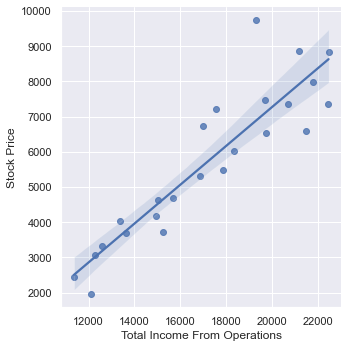

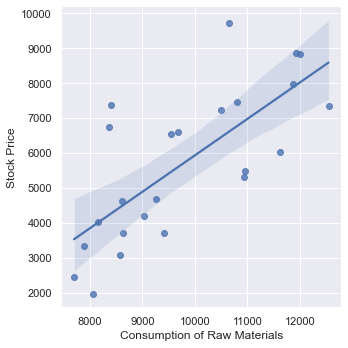

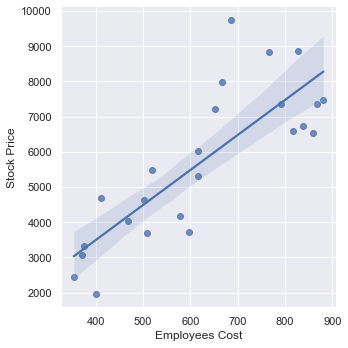

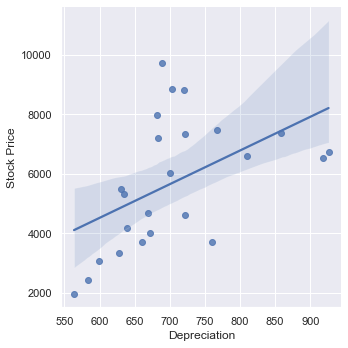

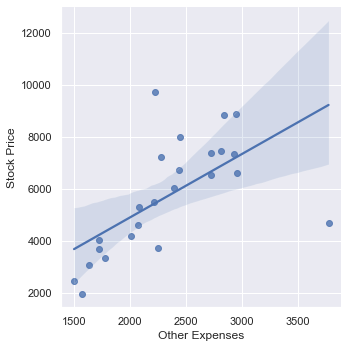

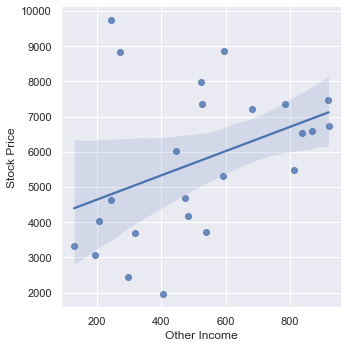

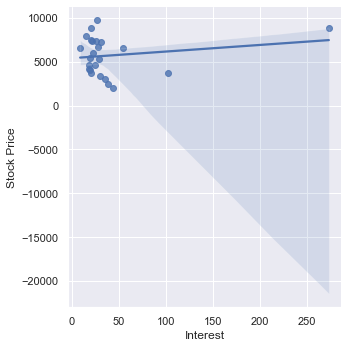

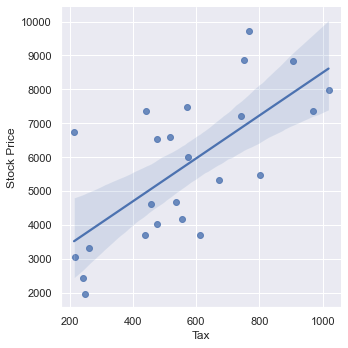

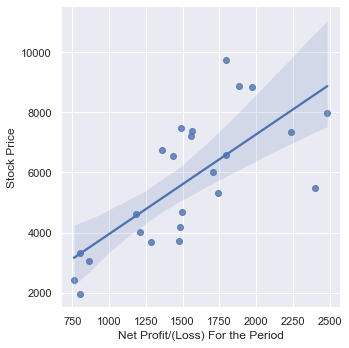

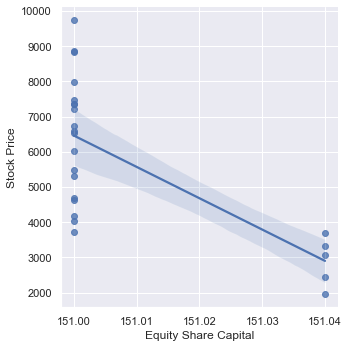

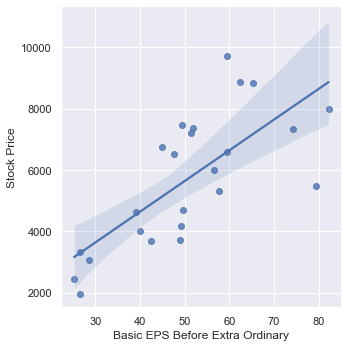

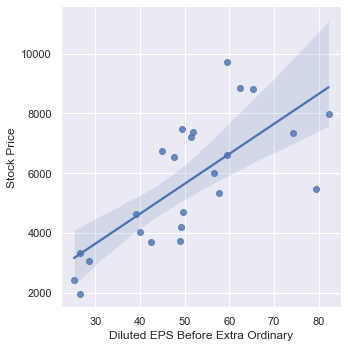

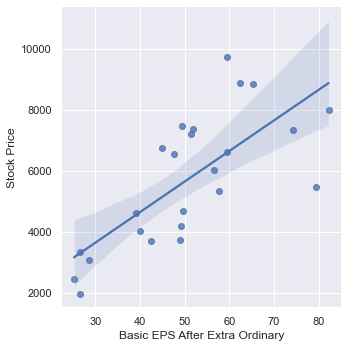

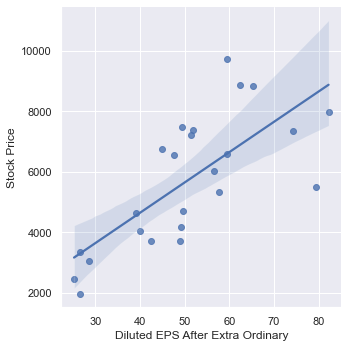

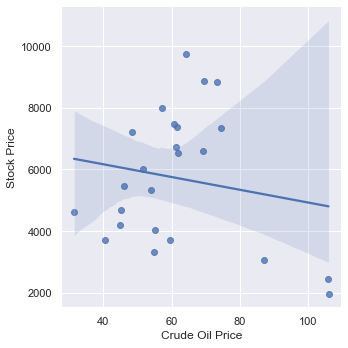

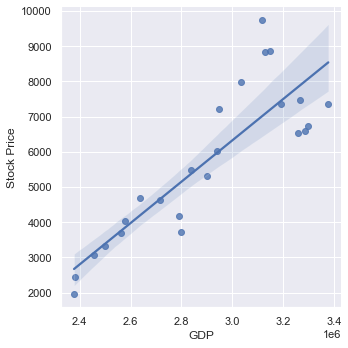

In [164]:
array = np.array(automotive_stocks_df['Company Name'].unique())
new_df = automotive_stocks_df[automotive_stocks_df['Company Name'] == array[1]]
cols = new_df.columns[4:new_df.shape[0]]
print(array[1])
for num in range(0,len(cols)):
    mycol = cols[num]
    sn.lmplot( data = new_df,
           x = mycol,
           y = 'Stock Price');

Maruti Suzuki India Limited


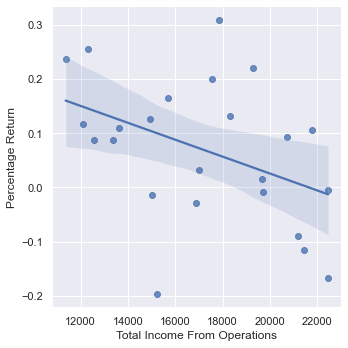

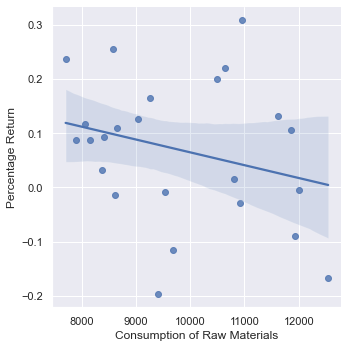

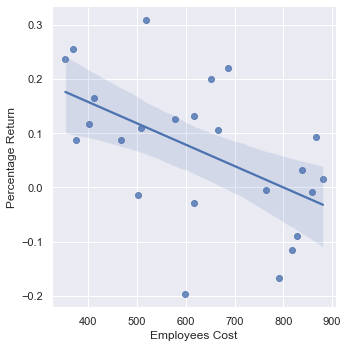

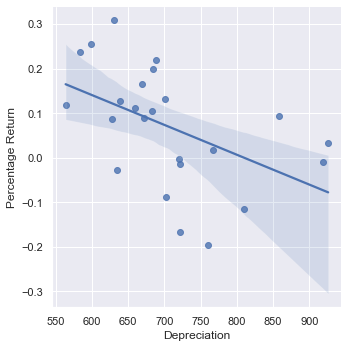

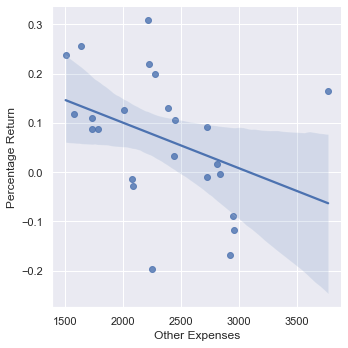

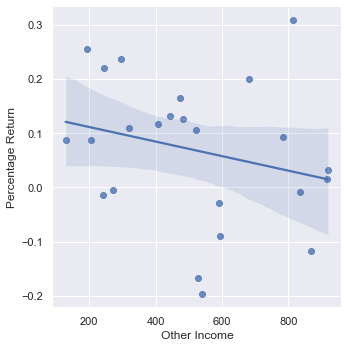

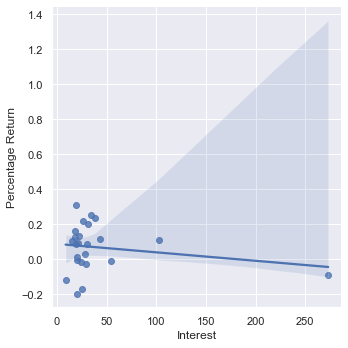

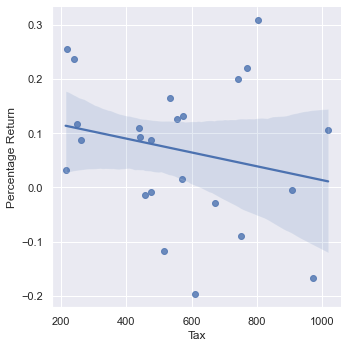

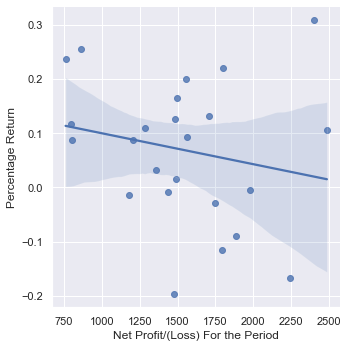

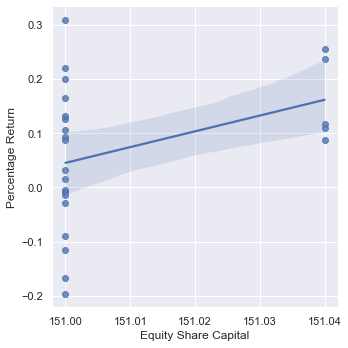

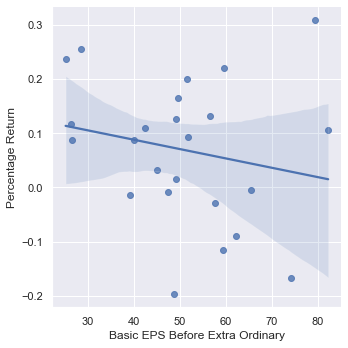

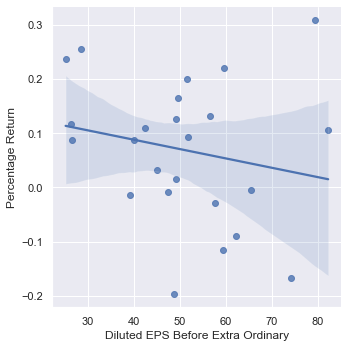

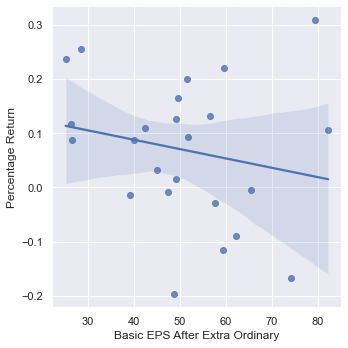

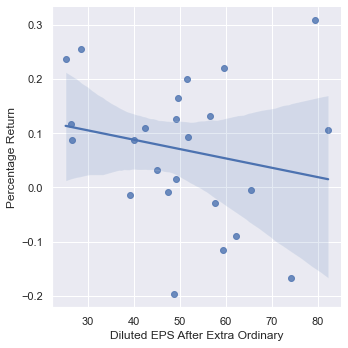

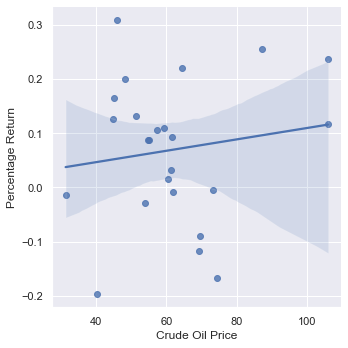

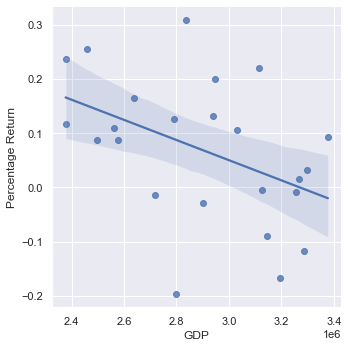

In [165]:
array = np.array(automotive_stocks_df['Company Name'].unique())
new_df = automotive_stocks_df[automotive_stocks_df['Company Name'] == array[1]]
cols = new_df.columns[4:new_df.shape[0]]
print(array[1])
for num in range(0,len(cols)):
    mycol = cols[num]
    sn.lmplot( data = new_df,
           x = mycol,
           y = 'Percentage Return');

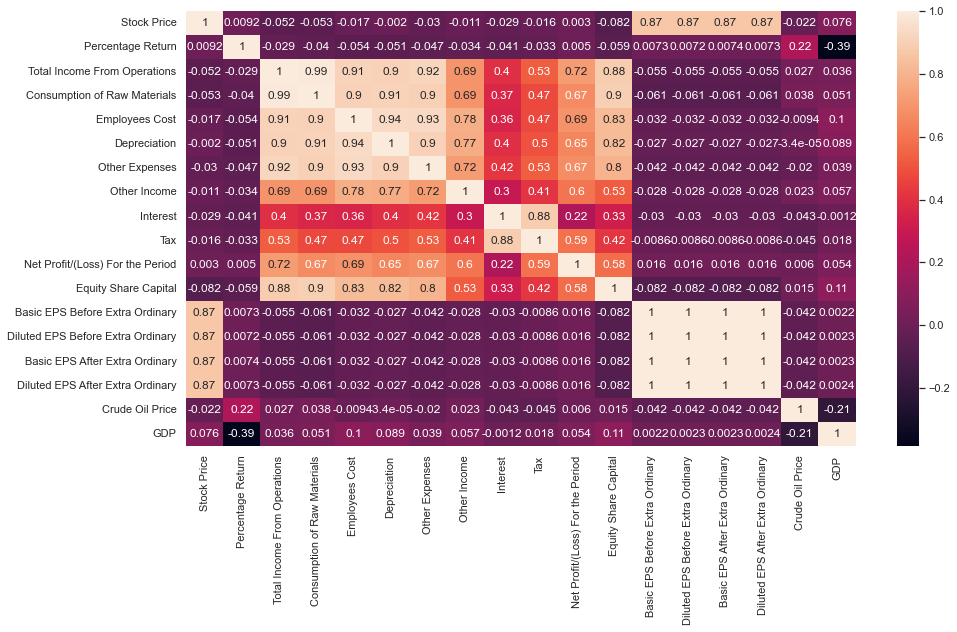

In [10]:
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(automotive_stocks_df.corr(),annot=True)
plt.show()

# Setting up data for stock prediction

This step involves 
1. Setting up data to predict current quarters returns based on previous quarters returns, For this the dataset should be shifted by one level (lag1)
2. Splitting data into training and testing data

In [11]:
#Creating a copy of dataset for manipulation
automotive_stocks_prev = automotive_stocks_df.copy()

In [12]:
automotive_stocks_prev

,Company Name,Time Period,Stock Price,Percentage Return,Total Income From Operations,Consumption of Raw Materials,Employees Cost,Depreciation,Other Expenses,Other Income,Interest,Tax,Net Profit/(Loss) For the Period,Equity Share Capital,Basic EPS Before Extra Ordinary,Diluted EPS Before Extra Ordinary,Basic EPS After Extra Ordinary,Diluted EPS After Extra Ordinary,Crude Oil Price,GDP
0,Tata Motors Limited,Mar '14,35.41,0.1497,8545.49,5018.20,713.01,539.29,1947.25,148.24,322.56,-600.32,-816.61,643.78,-2.54,-2.54,-2.54,-2.54,105.90,2377153.849
1,Tata Motors Limited,Jun '14,39.06,0.1031,7704.76,5105.01,739.55,540.82,1814.10,1597.19,339.80,NaN,393.65,643.78,1.22,1.22,1.22,1.22,105.75,2379355.815
2,Tata Motors Limited,Sep '14,43.71,0.1190,8749.62,5297.36,751.00,613.47,1943.91,142.71,344.82,738.26,-1845.63,643.78,-5.73,-5.73,-5.73,-5.73,87.12,2457010.248
3,Tata Motors Limited,Dec '14,42.28,-0.0327,9056.08,5523.45,764.71,625.60,2438.66,58.44,418.41,18.14,-2122.72,643.78,-6.60,-6.60,-6.60,-6.60,54.74,2498611.783
4,Tata Motors Limited,Mar '15,45.06,0.0658,10784.28,6229.41,836.20,823.33,2358.93,83.07,470.91,7.83,-1164.25,643.78,-3.62,-3.62,-3.62,-3.62,59.36,2560191.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Amara Raja Batteries Limited,Dec '18,742.85,0.0039,1694.66,1189.36,86.61,65.68,215.81,12.50,1.79,66.91,130.89,17.08,7.66,7.66,7.66,7.66,60.53,3266006.550
476,Amara Raja Batteries Limited,Mar '19,717.45,-0.0342,1566.73,1016.21,81.52,68.32,221.43,6.32,1.85,58.91,119.34,17.08,6.99,6.99,6.99,6.99,69.25,3287871.770
477,Amara Raja Batteries Limited,Jun '19,619.95,-0.1359,1814.95,1003.46,98.53,73.31,211.04,10.23,2.89,72.30,140.91,17.08,8.25,8.25,8.25,8.25,61.78,3256509.346
478,Amara Raja Batteries Limited,Sep '19,717.60,0.1575,1695.31,1103.31,98.56,75.03,217.75,17.95,3.37,12.98,218.85,17.08,12.81,12.81,12.81,12.81,61.32,3297491.819


In [13]:
# Creating another dataframe to store the actual returns per quarter before shifting data by one level
# This dataframe will be merged later to the shifted dataframe in subsequent steps below
data = automotive_stocks_prev[["Company Name","Percentage Return","Time Period"]]
data = data.rename(columns = {'Percentage Return':'Actual Percentage Return', 'Company Name':'Company Name','Time Period':'Time Period'})

In [14]:
data

,Company Name,Actual Percentage Return,Time Period
0,Tata Motors Limited,0.1497,Mar '14
1,Tata Motors Limited,0.1031,Jun '14
2,Tata Motors Limited,0.1190,Sep '14
3,Tata Motors Limited,-0.0327,Dec '14
4,Tata Motors Limited,0.0658,Mar '15
...,...,...,...
475,Amara Raja Batteries Limited,0.0039,Dec '18
476,Amara Raja Batteries Limited,-0.0342,Mar '19
477,Amara Raja Batteries Limited,-0.1359,Jun '19
478,Amara Raja Batteries Limited,0.1575,Sep '19


In [15]:
pd.DataFrame(data.dtypes)

,0
Company Name,object
Actual Percentage Return,float64
Time Period,object


### Shifting data by one level (lag1)

In [16]:
#Identifying x variables (predictors)
x_features = ['Total Income From Operations', 'Consumption of Raw Materials', 'Employees Cost',
              'Depreciation', 'Other Expenses', 'Other Income', 
              'Interest', 'Tax','Net Profit/(Loss) For the Period', 
              'Equity Share Capital', 'Diluted EPS Before Extra Ordinary', 'Crude Oil Price', 'GDP']

In [17]:
#Shifting dataframe by one level (one quarter) so that pervious quarters values are mapped to current quarter and can be used for prediction

automotive_stocks = pd.DataFrame()
array = np.array(automotive_stocks_prev['Company Name'].unique())
for j in range(0,len(array)):
    #Performing data shift for each company
    new_df =[]
    new_df = automotive_stocks_prev[automotive_stocks_prev['Company Name'] == array[j]]
    new_data_df = data[data['Company Name'] == array[j]]
    new_df = new_df.shift(1)
    
    #Merging x variables from scaled dataset and original returns from dataset 'data' created above
    # With this, for a given quarter, the actual returns and previous quarters returns are available in a single row
    data_new = new_data_df.join(new_df[x_features]).iloc[1:]
    data_new = data_new.join(new_df['Percentage Return'])

    #Moving 'Percentage Return' and 'Company Name' to te begining of the dataframe for easy readability and comparison
    mycolumn = data_new.pop('Percentage Return')
    first_column = data_new.pop('Company Name')
  
    data_new.insert(1, 'Percentage Return', mycolumn)
    data_new.insert(0, 'Company Name', first_column)

    #Consolidating data for all companies into one dataset
    automotive_stocks = automotive_stocks.append(data_new, ignore_index = False)

In [18]:
automotive_stocks

,Company Name,Actual Percentage Return,Percentage Return,Time Period,Total Income From Operations,Consumption of Raw Materials,Employees Cost,Depreciation,Other Expenses,Other Income,Interest,Tax,Net Profit/(Loss) For the Period,Equity Share Capital,Diluted EPS Before Extra Ordinary,Crude Oil Price,GDP
1,Tata Motors Limited,0.1031,0.1497,Jun '14,8545.49,5018.20,713.01,539.29,1947.25,148.24,322.56,-600.32,-816.61,643.78,-2.54,105.90,2377153.849
2,Tata Motors Limited,0.1190,0.1031,Sep '14,7704.76,5105.01,739.55,540.82,1814.10,1597.19,339.80,NaN,393.65,643.78,1.22,105.75,2379355.815
3,Tata Motors Limited,-0.0327,0.1190,Dec '14,8749.62,5297.36,751.00,613.47,1943.91,142.71,344.82,738.26,-1845.63,643.78,-5.73,87.12,2457010.248
4,Tata Motors Limited,0.0658,-0.0327,Mar '15,9056.08,5523.45,764.71,625.60,2438.66,58.44,418.41,18.14,-2122.72,643.78,-6.60,54.74,2498611.783
5,Tata Motors Limited,-0.2350,0.0658,Jun '15,10784.28,6229.41,836.20,823.33,2358.93,83.07,470.91,7.83,-1164.25,643.78,-3.62,59.36,2560191.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Amara Raja Batteries Limited,0.0039,0.0190,Dec '18,1753.05,1216.25,92.83,64.25,212.50,14.24,1.82,64.56,120.23,17.08,7.04,74.46,3193097.227
476,Amara Raja Batteries Limited,-0.0342,0.0039,Mar '19,1694.66,1189.36,86.61,65.68,215.81,12.50,1.79,66.91,130.89,17.08,7.66,60.53,3266006.550
477,Amara Raja Batteries Limited,-0.1359,-0.0342,Jun '19,1566.73,1016.21,81.52,68.32,221.43,6.32,1.85,58.91,119.34,17.08,6.99,69.25,3287871.770
478,Amara Raja Batteries Limited,0.1575,-0.1359,Sep '19,1814.95,1003.46,98.53,73.31,211.04,10.23,2.89,72.30,140.91,17.08,8.25,61.78,3256509.346


In [19]:
pd.DataFrame(automotive_stocks.dtypes)

,0
Company Name,object
Actual Percentage Return,float64
Percentage Return,float64
Time Period,object
Total Income From Operations,float64
Consumption of Raw Materials,float64
Employees Cost,float64
Depreciation,float64
Other Expenses,float64
Other Income,float64


### Splitting Data into training and test data

In [20]:
#Splitting Time Period into 2 new columns 'Month' and 'Year' 
automotive_stocks.insert(loc=2, column='Month', value=["" for i in range(automotive_stocks.shape[0])])
automotive_stocks.insert(loc=3, column='Year', value=["" for i in range(automotive_stocks.shape[0])])

In [21]:
automotive_stocks

,Company Name,Actual Percentage Return,Month,Year,Percentage Return,Time Period,Total Income From Operations,Consumption of Raw Materials,Employees Cost,Depreciation,Other Expenses,Other Income,Interest,Tax,Net Profit/(Loss) For the Period,Equity Share Capital,Diluted EPS Before Extra Ordinary,Crude Oil Price,GDP
1,Tata Motors Limited,0.1031,,,0.1497,Jun '14,8545.49,5018.20,713.01,539.29,1947.25,148.24,322.56,-600.32,-816.61,643.78,-2.54,105.90,2377153.849
2,Tata Motors Limited,0.1190,,,0.1031,Sep '14,7704.76,5105.01,739.55,540.82,1814.10,1597.19,339.80,NaN,393.65,643.78,1.22,105.75,2379355.815
3,Tata Motors Limited,-0.0327,,,0.1190,Dec '14,8749.62,5297.36,751.00,613.47,1943.91,142.71,344.82,738.26,-1845.63,643.78,-5.73,87.12,2457010.248
4,Tata Motors Limited,0.0658,,,-0.0327,Mar '15,9056.08,5523.45,764.71,625.60,2438.66,58.44,418.41,18.14,-2122.72,643.78,-6.60,54.74,2498611.783
5,Tata Motors Limited,-0.2350,,,0.0658,Jun '15,10784.28,6229.41,836.20,823.33,2358.93,83.07,470.91,7.83,-1164.25,643.78,-3.62,59.36,2560191.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Amara Raja Batteries Limited,0.0039,,,0.0190,Dec '18,1753.05,1216.25,92.83,64.25,212.50,14.24,1.82,64.56,120.23,17.08,7.04,74.46,3193097.227
476,Amara Raja Batteries Limited,-0.0342,,,0.0039,Mar '19,1694.66,1189.36,86.61,65.68,215.81,12.50,1.79,66.91,130.89,17.08,7.66,60.53,3266006.550
477,Amara Raja Batteries Limited,-0.1359,,,-0.0342,Jun '19,1566.73,1016.21,81.52,68.32,221.43,6.32,1.85,58.91,119.34,17.08,6.99,69.25,3287871.770
478,Amara Raja Batteries Limited,0.1575,,,-0.1359,Sep '19,1814.95,1003.46,98.53,73.31,211.04,10.23,2.89,72.30,140.91,17.08,8.25,61.78,3256509.346


In [22]:
for i in range(0,automotive_stocks.shape[0]):
    x= automotive_stocks.iloc[i,5].split(" '",1)
    automotive_stocks.iloc[i,2] = x[0]
    automotive_stocks.iloc[i,3] = "20"+x[1]

In [23]:
#Moving Timer Period column as dataframe index
automotive_stocks = automotive_stocks.set_index('Time Period')

In [24]:
automotive_stocks

,Company Name,Actual Percentage Return,Month,Year,Percentage Return,Total Income From Operations,Consumption of Raw Materials,Employees Cost,Depreciation,Other Expenses,Other Income,Interest,Tax,Net Profit/(Loss) For the Period,Equity Share Capital,Diluted EPS Before Extra Ordinary,Crude Oil Price,GDP
Time Period,,,,,,,,,,,,,,,,,,
Jun '14,Tata Motors Limited,0.1031,Jun,2014,0.1497,8545.49,5018.20,713.01,539.29,1947.25,148.24,322.56,-600.32,-816.61,643.78,-2.54,105.90,2377153.849
Sep '14,Tata Motors Limited,0.1190,Sep,2014,0.1031,7704.76,5105.01,739.55,540.82,1814.10,1597.19,339.80,NaN,393.65,643.78,1.22,105.75,2379355.815
Dec '14,Tata Motors Limited,-0.0327,Dec,2014,0.1190,8749.62,5297.36,751.00,613.47,1943.91,142.71,344.82,738.26,-1845.63,643.78,-5.73,87.12,2457010.248
Mar '15,Tata Motors Limited,0.0658,Mar,2015,-0.0327,9056.08,5523.45,764.71,625.60,2438.66,58.44,418.41,18.14,-2122.72,643.78,-6.60,54.74,2498611.783
Jun '15,Tata Motors Limited,-0.2350,Jun,2015,0.0658,10784.28,6229.41,836.20,823.33,2358.93,83.07,470.91,7.83,-1164.25,643.78,-3.62,59.36,2560191.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dec '18,Amara Raja Batteries Limited,0.0039,Dec,2018,0.0190,1753.05,1216.25,92.83,64.25,212.50,14.24,1.82,64.56,120.23,17.08,7.04,74.46,3193097.227
Mar '19,Amara Raja Batteries Limited,-0.0342,Mar,2019,0.0039,1694.66,1189.36,86.61,65.68,215.81,12.50,1.79,66.91,130.89,17.08,7.66,60.53,3266006.550
Jun '19,Amara Raja Batteries Limited,-0.1359,Jun,2019,-0.0342,1566.73,1016.21,81.52,68.32,221.43,6.32,1.85,58.91,119.34,17.08,6.99,69.25,3287871.770


In [25]:
train = automotive_stocks[automotive_stocks['Year'] != '2019']
test = automotive_stocks[automotive_stocks['Year'] == '2019']

In [26]:
train

,Company Name,Actual Percentage Return,Month,Year,Percentage Return,Total Income From Operations,Consumption of Raw Materials,Employees Cost,Depreciation,Other Expenses,Other Income,Interest,Tax,Net Profit/(Loss) For the Period,Equity Share Capital,Diluted EPS Before Extra Ordinary,Crude Oil Price,GDP
Time Period,,,,,,,,,,,,,,,,,,
Jun '14,Tata Motors Limited,0.1031,Jun,2014,0.1497,8545.49,5018.20,713.01,539.29,1947.25,148.24,322.56,-600.32,-816.61,643.78,-2.54,105.90,2377153.849
Sep '14,Tata Motors Limited,0.1190,Sep,2014,0.1031,7704.76,5105.01,739.55,540.82,1814.10,1597.19,339.80,NaN,393.65,643.78,1.22,105.75,2379355.815
Dec '14,Tata Motors Limited,-0.0327,Dec,2014,0.1190,8749.62,5297.36,751.00,613.47,1943.91,142.71,344.82,738.26,-1845.63,643.78,-5.73,87.12,2457010.248
Mar '15,Tata Motors Limited,0.0658,Mar,2015,-0.0327,9056.08,5523.45,764.71,625.60,2438.66,58.44,418.41,18.14,-2122.72,643.78,-6.60,54.74,2498611.783
Jun '15,Tata Motors Limited,-0.2350,Jun,2015,0.0658,10784.28,6229.41,836.20,823.33,2358.93,83.07,470.91,7.83,-1164.25,643.78,-3.62,59.36,2560191.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dec '17,Amara Raja Batteries Limited,0.1850,Dec,2017,-0.1556,1427.50,864.21,74.16,58.35,173.23,12.23,1.25,63.50,127.22,17.08,7.45,57.30,3032795.021
Mar '18,Amara Raja Batteries Limited,-0.0538,Mar,2018,0.1850,1553.46,1086.74,75.76,58.74,197.17,16.76,1.13,64.02,134.45,17.08,7.87,64.30,3116597.991
Jun '18,Amara Raja Batteries Limited,-0.0866,Jun,2018,-0.0538,1580.74,1043.39,78.29,58.83,205.10,23.70,1.31,64.49,109.80,17.08,6.43,69.42,3147143.007


In [27]:
test

,Company Name,Actual Percentage Return,Month,Year,Percentage Return,Total Income From Operations,Consumption of Raw Materials,Employees Cost,Depreciation,Other Expenses,Other Income,Interest,Tax,Net Profit/(Loss) For the Period,Equity Share Capital,Diluted EPS Before Extra Ordinary,Crude Oil Price,GDP
Time Period,,,,,,,,,,,,,,,,,,
Mar '19,Tata Motors Limited,0.0312,Mar,2019,-0.2070,16207.67,10449.56,1060.11,766.83,2051.84,269.40,468.08,-98.70,617.62,679.22,1.80,60.53,3266006.550
Jun '19,Tata Motors Limited,-0.0701,Jun,2019,0.0312,18561.41,10288.92,1134.67,872.61,2750.48,419.80,389.14,159.32,106.19,679.22,0.30,69.25,3287871.770
Sep '19,Tata Motors Limited,-0.2817,Sep,2019,-0.0701,13351.91,9401.53,1149.34,777.05,2134.85,401.20,439.49,49.43,-97.10,679.22,-0.29,61.78,3256509.346
Dec '19,Tata Motors Limited,0.5221,Dec,2019,-0.2817,10000.48,5530.68,1067.09,760.65,2204.66,361.42,497.92,11.98,-1281.97,679.22,-3.78,61.32,3297491.819
Mar '19,Maruti Suzuki India Limited,-0.1164,Mar,2019,0.0160,19668.30,10802.40,881.10,767.70,2812.40,917.30,20.60,570.80,1489.30,151.00,49.30,60.53,3266006.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dec '19,Scooters India Limited,0.1095,Dec,2019,0.0072,17.67,8.40,4.82,0.48,1.55,0.32,NaN,NaN,-3.41,87.27,-0.39,61.32,3297491.819
Mar '19,Amara Raja Batteries Limited,-0.0342,Mar,2019,0.0039,1694.66,1189.36,86.61,65.68,215.81,12.50,1.79,66.91,130.89,17.08,7.66,60.53,3266006.550
Jun '19,Amara Raja Batteries Limited,-0.1359,Jun,2019,-0.0342,1566.73,1016.21,81.52,68.32,221.43,6.32,1.85,58.91,119.34,17.08,6.99,69.25,3287871.770


# Linear Models

Following regression models are Built:

### Model 1 
##### Hyper-parameters:
  1. No Scaling
  2. Filling Null values : Calculate average value of the month which has missing values and fill NAs with the average value.
     - Example: If 'Tax' column is empty for Marh 2014, pcik the values of March 2015, March 2016, March 2017 and March 2018 and calculate the average. Fill the result as value for March 2014.


### Model 2 
##### Hyper-parameters:
  1. No Scaling
  2. Filling Null values : using Random Forest Method
  

### Model 3 
##### Hyper-parameters:
  1. Min-Max Scaling
  2. Filling Null values : Calculate average value of the month which has missing values and fill NAs with the average value.
     - Example: If 'Tax' column is empty for Marh 2014, pcik the values of March 2015, March 2016, March 2017 and March 2018 and calculate the average. Fill the result as value for March 2014.
     
     
### Model 4 
##### Hyper-parameters:
  1. Min-Max Scaling
  2. Filling Null values : using Random Forest Method


### Model 5 
##### Hyper-parameters:
  1. z-score Scaling
  2. Filling Null values : Calculate average value of the month which has missing values and fill NAs with the average value.
     - Example: If 'Tax' column is empty for Marh 2014, pcik the values of March 2015, March 2016, March 2017 and March 2018 and calculate the average. Fill the result as value for March 2014.
     
     
### Model 6 
##### Hyper-parameters:
  1. z-score Scaling
  2. Filling Null values : using Random Forest Method

# Building Each Linear Model

## Model 1 
#### Hyper-parameters:
  1. No Scaling
  2. Filling Null values : Calculate average value of the month which has missing values and fill NAs with the average value.
     - Example: If 'Tax' column is empty for Marh 2014, pcik the values of March 2015, March 2016, March 2017 and March 2018 and calculate the average. Fill the result as value for March 2014.

### Imputing Columns that have null values

In [253]:
#Creating a class for custom Imputer which will be included into the model pipeline

class CustomTransformerForNA_model1(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print('\n')

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        mydata = X.copy()
        mydata['Consumption of Raw Materials'] = mydata['Consumption of Raw Materials'].fillna(0)
        for i in range(mydata.shape[0]):
            for l in range(mydata.shape[1]):
                if (pd.isna(mydata.iloc[i][l]) == True) :
                    array1 =[]
                    mon = mydata.iloc[i]['Month']
                    year = mydata.iloc[i]['Year']
                    comp = mydata.iloc[i]['Company Name']
                    for n in range(mydata.shape[0]):
                        if (mydata['Month'][n] == mon):
                            array1.append(mydata.iloc[n][l])
                    array1 = [x for x in array1 if str(x) != 'nan']
                    if (len(array1) != 0):
                        imputed_value = sum(array1)/len(array1)
                    else:
                        imputed_value = 0
                    for k in range(mydata.shape[0]):
                        for m in range(mydata.shape[1]):
                            if (mydata['Company Name'][k] == comp and mydata['Month'][k] == mon and mydata['Year'][k] == year and pd.isna(mydata.iloc[k][m])== True):
                                mydata.iloc[[k],[m]]= imputed_value
        mydata = mydata.drop(['Company Name'], axis=1)
        mydata = mydata.drop(['Actual Percentage Return'], axis=1)
        mydata = mydata.drop(['Percentage Return'], axis=1)
        mydata = mydata.drop(['Month'], axis=1)
        mydata = mydata.drop(['Year'], axis=1)                        
        return mydata

In [254]:
#Creating a pipeline with custom imputers and scaling
lreg_model1 = Pipeline(steps=[
                       ('custom_null', CustomTransformerForNA_model1()),
                       ('regressor', LinearRegression())
])

## Fitting the linear model on training data and predicting on test data

In [255]:
automotive_stocks_predicted_model1 = pd.DataFrame()
array = np.array(train['Company Name'].unique())
for j in range(0,len(array)):
    new_df =[]
    new_train_df = train[train['Company Name'] == array[j]]
    new_test_df = test[test['Company Name'] == array[j]]
    
    #fitting model on training data
    lreg_model1.fit(new_train_df, new_train_df["Actual Percentage Return"])

    
    #Understanding model parameters
    print("Company Name :",array[j])
    print("Model Intercept :",lreg_model1['regressor'].intercept_)
    print("Model Coefficients :", lreg_model1['regressor'].coef_)
    print('\n')
    
    #predicting on test data
    y_pred = lreg_model1.predict(new_test_df)
    y_pred = pd.Series(y_pred, index=new_test_df.index)

    #creating dataframe to store predicted values for all companies
    y_df = pd.DataFrame({"Company Name":array[j],"actual": new_test_df['Actual Percentage Return'],
                     "predicted_model1": y_pred,
                     "residual_model1": y_pred - new_test_df['Actual Percentage Return']})
    automotive_stocks_predicted_model1 = automotive_stocks_predicted_model1.append(y_df, ignore_index = False)

Company Name : Tata Motors Limited
Model Intercept : 4.355434682714362
Model Coefficients : [-6.05185839e-06  1.74864127e-04 -5.75382113e-03  1.55529304e-03
  7.81984261e-05  2.77128884e-04 -4.07928175e-03 -1.55593361e-04
  3.97828015e-04 -3.00664420e-03 -1.49817884e-01 -6.19055224e-03
  7.34425672e-07]


Company Name : Maruti Suzuki India Limited
Model Intercept : 12.14206339011875
Model Coefficients : [-1.02684983e-04  4.39247153e-05  1.96482838e-03 -1.23387189e-03
  1.01604661e-04 -1.10208909e-04 -1.16283663e-03  1.36462628e-04
  4.72879079e-01 -7.00281058e-02 -1.42783300e+01  1.10562482e-03
 -4.04916719e-07]


Company Name : TVS Motor Company Limited
Model Intercept : 3.1736132027959076
Model Coefficients : [-6.27837593e-04  6.36197240e-04 -7.43948069e-03  3.19742370e-02
  9.62535738e-04  5.15563632e-03 -2.33841639e-02  7.02062763e-03
  3.74764374e-02 -3.36883299e-15 -1.92416666e+00  5.52875431e-03
 -1.35518587e-06]


Company Name : Hero Motocorp Limited
Model Intercept : 0.0024150

In [192]:
automotive_stocks_predicted_model1

,Company Name,actual,predicted_model1,residual_model1
Time Period,,,,
Mar '19,Tata Motors Limited,0.0312,-0.523614,-0.554814
Jun '19,Tata Motors Limited,-0.0701,-0.468907,-0.398807
Sep '19,Tata Motors Limited,-0.2817,-1.036447,-0.754747
Dec '19,Tata Motors Limited,0.5221,-1.398947,-1.921047
Mar '19,Maruti Suzuki India Limited,-0.1164,0.126840,0.243240
...,...,...,...,...
Dec '19,Scooters India Limited,0.1095,1.298285,1.188785
Mar '19,Amara Raja Batteries Limited,-0.0342,0.120208,0.154408
Jun '19,Amara Raja Batteries Limited,-0.1359,0.244573,0.380473


### Measuring Accuracy

In [193]:
accuracy_df_model1 = pd.DataFrame()
for j in range(0,len(array)):
    new_df =[]
    new_train_df = automotive_stocks_predicted_model1[automotive_stocks_predicted_model1['Company Name'] == array[j]]
    mse_v1 = mean_squared_error(new_train_df['actual'], new_train_df['predicted_model1'])
    rmse_v1 = np.sqrt(mse_v1)
    r2_v1 = r2_score(new_train_df['actual'], new_train_df['predicted_model1'])
    temp_df = pd.DataFrame({"Company Name": array[j],"MSE_model1": [mse_v1], "RMSE_model1": [rmse_v1],"R2_model1": [r2_v1]})
    accuracy_df_model1 = accuracy_df_model1.append(temp_df, ignore_index = True)

In [169]:
#accuracy_df_model1 = pd.DataFrame()
#for j in range(0,len(array)):
    #new_df =[]
    #new_train_df = automotive_stocks_predicted_model1[automotive_stocks_predicted_model1['Company Name'] == array[j]]
#mse_v1 = mean_squared_error(automotive_stocks_predicted_model1['actual'], automotive_stocks_predicted_model1['predicted_model1'])
#rmse_v1 = np.sqrt(mse_v1)
#r2_v1 = r2_score(automotive_stocks_predicted_model1['actual'], automotive_stocks_predicted_model1['predicted_model1'])
#temp_df = pd.DataFrame({"MSE_model1": [mse_v1], "RMSE_model1": [rmse_v1],"R2_model1": [r2_v1]})
#accuracy_df_model1 = accuracy_df_model1.append(temp_df, ignore_index = True)

In [194]:
accuracy_df_model1

,Company Name,MSE_model1,RMSE_model1,R2_model1
0,Tata Motors Limited,1.181732,1.087075,-12.595623
1,Maruti Suzuki India Limited,0.048404,0.220008,-7.326602
2,TVS Motor Company Limited,0.025271,0.158970,-1.299944
3,Hero Motocorp Limited,0.188967,0.434703,-20.295599
4,Mahindra CIE Automotive Limited,3.856054,1.963684,-325.028950
5,Bajaj Auto Limited,0.039363,0.198401,-14.185099
6,Ashok Leyland Limited,0.277030,0.526336,-11.219588
7,Eicher Motors Limited,2.838368,1.684746,-120.784660
8,Force Motors Limited,3.566535,1.888527,-310.166664
9,Apollo Tyres Limited,0.141475,0.376132,-1654.514192


[Text(0, 0, 'Tata Motors Limited'),
 Text(1, 0, 'Maruti Suzuki India Limited'),
 Text(2, 0, 'TVS Motor Company Limited'),
 Text(3, 0, 'Hero Motocorp Limited'),
 Text(4, 0, 'Mahindra CIE Automotive Limited'),
 Text(5, 0, 'Bajaj Auto Limited'),
 Text(6, 0, 'Ashok Leyland Limited'),
 Text(7, 0, 'Eicher Motors Limited'),
 Text(8, 0, 'Force Motors Limited'),
 Text(9, 0, 'Apollo Tyres Limited'),
 Text(10, 0, 'MRF Limited'),
 Text(11, 0, 'Goodyear Inida Limited'),
 Text(12, 0, 'Ceat Limited'),
 Text(13, 0, 'JK Tyre and Industries Limited'),
 Text(14, 0, 'Castrol India Limited'),
 Text(15, 0, 'Indian Oil Corporation Limited'),
 Text(16, 0, 'Kirloskar Industries Limited'),
 Text(17, 0, 'Exide Industries Limited'),
 Text(18, 0, 'Scooters India Limited'),
 Text(19, 0, 'Amara Raja Batteries Limited')]

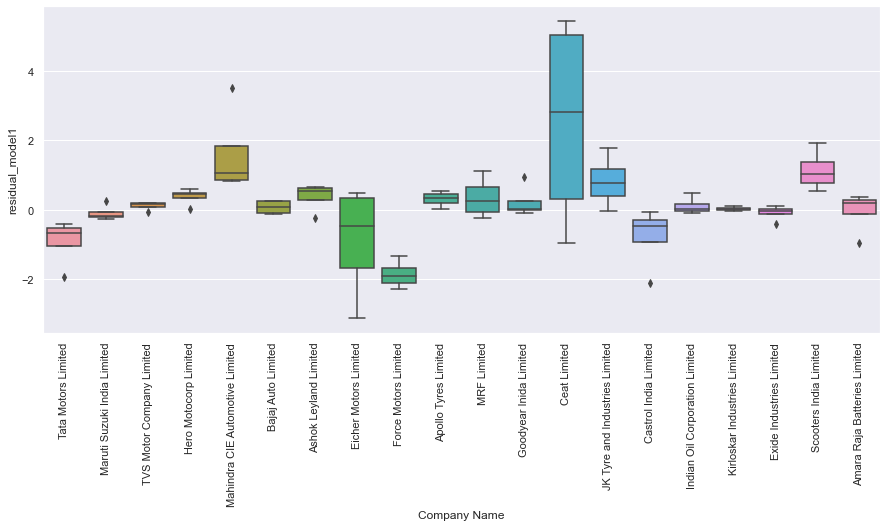

In [195]:
plt.figure(figsize=(15, 6))
plot = sn.boxplot(data = automotive_stocks_predicted_model1, x = 'Company Name', y = 'residual_model1');
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
#plot.set(ylim=(-5,5))

### Model 2 
##### Hyper-parameters:
  1. No Scaling
  2. Filling Null values : using Random Forest Method

### Imputing Columns that have null values using Random Forest Method

In [196]:
#Creating a class for custom Imputer which will be included into the model pipeline

class RMTransformerForNA_model2(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print('\n')

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        mydata = X.copy()
        mydata = mydata.drop(['Company Name'], axis=1)
        mydata = mydata.drop(['Actual Percentage Return'], axis=1)
        mydata = mydata.drop(['Percentage Return'], axis=1)
        mydata = mydata.drop(['Month'], axis=1)
        mydata = mydata.drop(['Year'], axis=1)
                
                
        mylist = mydata.isna().all()
        for m in range(0,len(mylist)):
            if (mylist[m] == True):
                cols = mydata.columns[m]
                mydata[cols].fillna(0, inplace=True)
        
        imputer = MissForest() #miss forest
        imputed = imputer.fit_transform(mydata)
        imputed = pd.DataFrame(imputed, columns = mydata.columns).round(1)
        return imputed

In [197]:
#Creating a pipeline with custom imputers and scaling
lreg_model2 = Pipeline(steps=[
                       ('custom_null', RMTransformerForNA_model2()),
                       ('regressor', LinearRegression())
])

## Fitting the linear model on training data and predicting on test data

In [198]:
automotive_stocks_predicted_model2 = pd.DataFrame()
array = np.array(train['Company Name'].unique())
for j in range(0,len(array)):
    new_df =[]
    new_train_df = train[train['Company Name'] == array[j]]
    new_test_df = test[test['Company Name'] == array[j]]
    
    #fitting model on training data
    lreg_model2.fit(new_train_df, new_train_df["Actual Percentage Return"])

    
    #predicting on test data
    y_pred = lreg_model2.predict(new_test_df)
    y_pred = pd.Series(y_pred, index=new_test_df.index)

    #creating dataframe to store predicted values for all companies
    y_df = pd.DataFrame({"Company Name":array[j],"actual": new_test_df['Actual Percentage Return'],
                     "predicted_model2": y_pred,
                     "residual_model2": y_pred - new_test_df['Actual Percentage Return']})
    automotive_stocks_predicted_model2 = automotive_stocks_predicted_model2.append(y_df, ignore_index = False)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning or

Iteration: 1
Iteration: 2


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning or

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 2
Iteration: 0


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


In [199]:
automotive_stocks_predicted_model2

,Company Name,actual,predicted_model2,residual_model2
Time Period,,,,
Mar '19,Tata Motors Limited,0.0312,-0.453283,-0.484483
Jun '19,Tata Motors Limited,-0.0701,-0.772820,-0.702720
Sep '19,Tata Motors Limited,-0.2817,-0.590133,-0.308433
Dec '19,Tata Motors Limited,0.5221,-1.113710,-1.635810
Mar '19,Maruti Suzuki India Limited,-0.1164,0.237749,0.354149
...,...,...,...,...
Dec '19,Scooters India Limited,0.1095,-0.308655,-0.418155
Mar '19,Amara Raja Batteries Limited,-0.0342,0.163821,0.198021
Jun '19,Amara Raja Batteries Limited,-0.1359,0.338000,0.473900


### Measuring Accuracy

In [200]:
accuracy_df_model2 = pd.DataFrame()
for j in range(0,len(array)):
    new_df =[]
    new_train_df = automotive_stocks_predicted_model2[automotive_stocks_predicted_model2['Company Name'] == array[j]]
    mse_v1 = mean_squared_error(new_train_df['actual'], new_train_df['predicted_model2'])
    rmse_v1 = np.sqrt(mse_v1)
    r2_v1 = r2_score(new_train_df['actual'], new_train_df['predicted_model2'])
    temp_df = pd.DataFrame({"Company Name": array[j],"MSE_model2": [mse_v1], "RMSE_model2": [rmse_v1],"R2_model2": [r2_v1]})
    accuracy_df_model2 = accuracy_df_model2.append(temp_df, ignore_index = True)

In [201]:
accuracy_df_model2

,Company Name,MSE_model2,RMSE_model2,R2_model2
0,Tata Motors Limited,0.874886,0.935354,-9.065416
1,Maruti Suzuki India Limited,0.036114,0.190036,-5.212423
2,TVS Motor Company Limited,0.041423,0.203528,-2.769928
3,Hero Motocorp Limited,0.180141,0.424430,-19.300963
4,Mahindra CIE Automotive Limited,3.845279,1.960938,-324.117940
5,Bajaj Auto Limited,0.039219,0.198038,-14.129564
6,Ashok Leyland Limited,0.191533,0.437645,-7.448394
7,Eicher Motors Limited,2.815896,1.678063,-119.820476
8,Force Motors Limited,8.342617,2.888359,-726.861746
9,Apollo Tyres Limited,0.223503,0.472761,-2614.391754


### Error Analysis

[Text(0, 0, 'Tata Motors Limited'),
 Text(1, 0, 'Maruti Suzuki India Limited'),
 Text(2, 0, 'TVS Motor Company Limited'),
 Text(3, 0, 'Hero Motocorp Limited'),
 Text(4, 0, 'Mahindra CIE Automotive Limited'),
 Text(5, 0, 'Bajaj Auto Limited'),
 Text(6, 0, 'Ashok Leyland Limited'),
 Text(7, 0, 'Eicher Motors Limited'),
 Text(8, 0, 'Force Motors Limited'),
 Text(9, 0, 'Apollo Tyres Limited'),
 Text(10, 0, 'MRF Limited'),
 Text(11, 0, 'Goodyear Inida Limited'),
 Text(12, 0, 'Ceat Limited'),
 Text(13, 0, 'JK Tyre and Industries Limited'),
 Text(14, 0, 'Castrol India Limited'),
 Text(15, 0, 'Indian Oil Corporation Limited'),
 Text(16, 0, 'Kirloskar Industries Limited'),
 Text(17, 0, 'Exide Industries Limited'),
 Text(18, 0, 'Scooters India Limited'),
 Text(19, 0, 'Amara Raja Batteries Limited')]

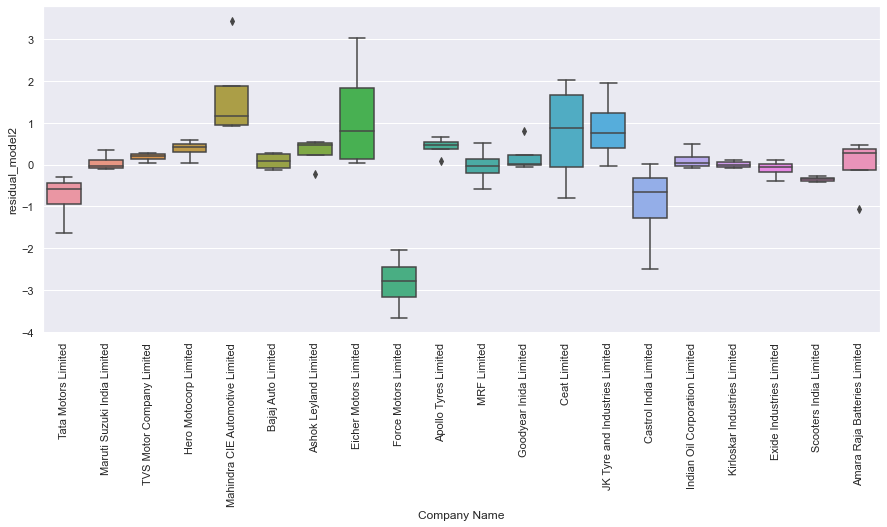

In [202]:
plt.figure(figsize=(15, 6))
plot = sn.boxplot(data = automotive_stocks_predicted_model2, x = 'Company Name', y = 'residual_model2');
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
#plot.set(ylim=(-10,10))

## Model 3

### Hyper-parameters:
  1. Min-Max Scaling
  2. Filling Null values : Calculate average value of the month which has missing values and fill NAs with the average value.
     - Example: If 'Tax' column is empty for Marh 2014, pcik the values of March 2015, March 2016, March 2017 and March 2018 and calculate the average. Fill the result as value for March 2014.

### Imputing Columns that have null values

In [203]:
#Creating a class for custom Imputer which will be included into the model pipeline

class CustomTransformerForNA_model3(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print('\n')

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        mydata = X.copy()
        #print(mydata)
        mydata['Consumption of Raw Materials'] = mydata['Consumption of Raw Materials'].fillna(0)
        for i in range(mydata.shape[0]):
            for l in range(mydata.shape[1]):
                if (pd.isna(mydata.iloc[i][l]) == True) :
                    array1 =[]
                    mon = mydata.iloc[i]['Month']
                    year = mydata.iloc[i]['Year']
                    comp = mydata.iloc[i]['Company Name']
                    for n in range(mydata.shape[0]):
                        if (mydata['Month'][n] == mon):
                            array1.append(mydata.iloc[n][l])
                    array1 = [x for x in array1 if str(x) != 'nan']
                    if (len(array1) != 0):
                        imputed_value = sum(array1)/len(array1)
                    else:
                        imputed_value = 0
                    for k in range(mydata.shape[0]):
                        for m in range(mydata.shape[1]):
                            if (mydata['Company Name'][k] == comp and mydata['Month'][k] == mon and mydata['Year'][k] == year and pd.isna(mydata.iloc[k][m])== True):
                                 mydata.iloc[[k],[m]]= imputed_value
        return mydata

### Scaling data using Min-Max Method

In [204]:
#Creating a class for Scaling along with few custom steps which will be included into the model pipeline

class CustomTransformerForScaling_model3(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print('\n')

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        mydata = X.copy()
        mydata = mydata.drop(['Month'], axis=1)
        mydata = mydata.drop(['Year'], axis=1)
        #print(mydata)
        sc = MinMaxScaler()
        #print(mydata)
        automotive_stocks_scaled= sc.fit_transform(mydata.iloc[:,3:mydata.shape[1]])
        
        automotive_stocks_scaled = pd.DataFrame(automotive_stocks_scaled, columns=['Total Income From Operations', 'Consumption of Raw Materials', 'Employees Cost', 'Depreciation','Other Expenses','Other Income','Interest','Tax','Net Profit/(Loss) For the Period','Equity Share Capital','Diluted EPS Before Extra Ordinary','Crude Oil Price','GDP'], index=mydata.index)
        automotive_stocks_scaled.insert(0, 'Company Name', mydata['Company Name'])
        final_data = automotive_stocks_scaled.iloc[:,1:automotive_stocks_scaled.shape[1]]
        #print(final_data)
        return final_data
        

In [205]:
#Creating a pipeline with custom imputers and scaling
lreg_model3 = Pipeline(steps=[
                       ('custom_null', CustomTransformerForNA_model3()),
                       ('custom_scale', CustomTransformerForScaling_model3()),
                       ('regressor', LinearRegression())
])

## Fitting the linear model on training data and predicting on test data

In [206]:
automotive_stocks_predicted_model3 = pd.DataFrame()
array = np.array(train['Company Name'].unique())
for j in range(0,len(array)):
    new_df =[]
    new_train_df = train[train['Company Name'] == array[j]]
    new_test_df = test[test['Company Name'] == array[j]]
    
    #fitting model on training data
    lreg_model3.fit(new_train_df, new_train_df["Actual Percentage Return"])

    
    #Understanding model parameters
    print("Company Name :",array[j])
    print("Model Intercept :",lreg_model3['regressor'].intercept_)
    print("Model Coefficients :", lreg_model3['regressor'].coef_)
    print('\n')
    
    #predicting on test data
    y_pred = lreg_model3.predict(new_test_df)
    y_pred = pd.Series(y_pred, index=new_test_df.index)

    #creating dataframe to store predicted values for all companies
    y_df = pd.DataFrame({"Company Name":array[j],"actual": new_test_df['Actual Percentage Return'],
                     "predicted_model3": y_pred,
                     "residual_model3": y_pred - new_test_df['Actual Percentage Return']})
    automotive_stocks_predicted_model3 = automotive_stocks_predicted_model3.append(y_df, ignore_index = False)

Company Name : Tata Motors Limited
Model Intercept : 0.6181564659310519
Model Coefficients : [-0.07307353  1.24015213 -2.247385    0.49284126  0.14237118  0.42643207
 -0.72807021 -0.20827416  1.31695792 -0.10655547 -1.51016427 -0.46101043
  0.59924976]


Company Name : Maruti Suzuki India Limited
Model Intercept : 0.18476070676297518
Model Coefficients : [-1.13875182e+00  2.12701481e-01  9.32684386e-01 -2.42098003e-01
  2.30417018e-01 -7.53443206e-02 -3.00128133e-01  1.09264262e-01
  8.14307231e+02 -2.80112423e-03 -8.14007596e+02  8.23358800e-02
 -3.30389115e-01]


Company Name : TVS Motor Company Limited
Model Intercept : 0.18512041310748517
Model Coefficients : [-1.78165869e+00  1.38759708e+00 -9.14684151e-01  2.17520735e+00
  2.93303890e-01  3.22021044e-01 -4.14133542e-01  6.15006980e-01
  6.03520548e+00 -6.66133815e-15 -6.65761663e+00  4.11726334e-01
 -1.10575494e+00]


Company Name : Hero Motocorp Limited
Model Intercept : 0.3816418302333944
Model Coefficients : [-3.79933288e-01  

In [207]:
automotive_stocks_predicted_model3

,Company Name,actual,predicted_model3,residual_model3
Time Period,,,,
Mar '19,Tata Motors Limited,0.0312,1.249843,1.218643
Jun '19,Tata Motors Limited,-0.0701,0.575964,0.646064
Sep '19,Tata Motors Limited,-0.2817,-0.864838,-0.583138
Dec '19,Tata Motors Limited,0.5221,0.474476,-0.047624
Mar '19,Maruti Suzuki India Limited,-0.1164,0.659538,0.775938
...,...,...,...,...
Dec '19,Scooters India Limited,0.1095,2.495463,2.385963
Mar '19,Amara Raja Batteries Limited,-0.0342,-0.390004,-0.355804
Jun '19,Amara Raja Batteries Limited,-0.1359,0.166707,0.302607


### Measuring Accuracy

In [208]:
accuracy_df_model3 = pd.DataFrame()
for j in range(0,len(array)):
    new_df =[]
    new_train_df = automotive_stocks_predicted_model3[automotive_stocks_predicted_model3['Company Name'] == array[j]]
    mse_v1 = mean_squared_error(new_train_df['actual'], new_train_df['predicted_model3'])
    rmse_v1 = np.sqrt(mse_v1)
    r2_v1 = r2_score(new_train_df['actual'], new_train_df['predicted_model3'])
    temp_df = pd.DataFrame({"Company Name": array[j],"MSE_model3": [mse_v1], "RMSE_model3": [rmse_v1],"R2_model3": [r2_v1]})
    accuracy_df_model3 = accuracy_df_model3.append(temp_df, ignore_index = True)

In [209]:
accuracy_df_model3

,Company Name,MSE_model3,RMSE_model3,R2_model3
0,Tata Motors Limited,0.561202,0.749134,-5.456528
1,Maruti Suzuki India Limited,0.260826,0.510711,-43.868474
2,TVS Motor Company Limited,0.352092,0.593374,-31.043724
3,Hero Motocorp Limited,0.445559,0.667502,-49.212293
4,Mahindra CIE Automotive Limited,0.453389,0.673342,-37.334028
5,Bajaj Auto Limited,0.124802,0.353274,-47.145066
6,Ashok Leyland Limited,1.398479,1.182573,-60.685978
7,Eicher Motors Limited,2.015705,1.419755,-85.486999
8,Force Motors Limited,2.443314,1.563110,-212.169884
9,Apollo Tyres Limited,0.690309,0.830848,-8076.866348


### Error Analysis

[Text(0, 0, 'Tata Motors Limited'),
 Text(1, 0, 'Maruti Suzuki India Limited'),
 Text(2, 0, 'TVS Motor Company Limited'),
 Text(3, 0, 'Hero Motocorp Limited'),
 Text(4, 0, 'Mahindra CIE Automotive Limited'),
 Text(5, 0, 'Bajaj Auto Limited'),
 Text(6, 0, 'Ashok Leyland Limited'),
 Text(7, 0, 'Eicher Motors Limited'),
 Text(8, 0, 'Force Motors Limited'),
 Text(9, 0, 'Apollo Tyres Limited'),
 Text(10, 0, 'MRF Limited'),
 Text(11, 0, 'Goodyear Inida Limited'),
 Text(12, 0, 'Ceat Limited'),
 Text(13, 0, 'JK Tyre and Industries Limited'),
 Text(14, 0, 'Castrol India Limited'),
 Text(15, 0, 'Indian Oil Corporation Limited'),
 Text(16, 0, 'Kirloskar Industries Limited'),
 Text(17, 0, 'Exide Industries Limited'),
 Text(18, 0, 'Scooters India Limited'),
 Text(19, 0, 'Amara Raja Batteries Limited')]

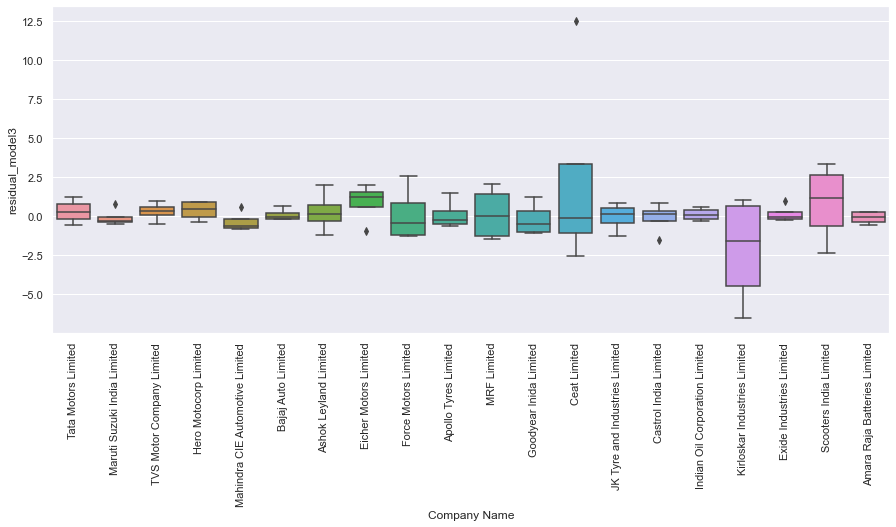

In [210]:
plt.figure(figsize=(15, 6))
plot = sn.boxplot(data = automotive_stocks_predicted_model3, x = 'Company Name', y = 'residual_model3');
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
#plot.set(ylim=(-30,30))

### Model 4
#### Hyper-parameters:
  1. Min-Max Scaling
  2. Filling Null values : using Random Forest Method

### Imputing Columns that have null values using Random Forest Method

In [211]:
#Creating a class for custom Imputer which will be included into the model pipeline

class RMTransformerForNA_model4(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print('\n')

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        mydata = X.copy()
        mydata = mydata.drop(['Company Name'], axis=1)
        mydata = mydata.drop(['Actual Percentage Return'], axis=1)
        mydata = mydata.drop(['Percentage Return'], axis=1)
        mydata = mydata.drop(['Month'], axis=1)
        mydata = mydata.drop(['Year'], axis=1)
                
        mylist = mydata.isna().all()
        for m in range(0,len(mylist)):
            if (mylist[m] == True):
                cols = mydata.columns[m]
                mydata[cols].fillna(0, inplace=True)
        
        imputer = MissForest() #miss forest
        imputed = imputer.fit_transform(mydata)
        imputed = pd.DataFrame(imputed, columns = mydata.columns).round(1)
        return imputed

### Scaling data using Min-Max Method

In [212]:
#Creating a class for Scaling along with few custom steps which will be included into the model pipeline

class CustomTransformerForScaling_model4(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print('\n')

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        mydata = X.copy()
        sc = MinMaxScaler()
        automotive_stocks_scaled= sc.fit_transform(mydata)
        automotive_stocks_scaled = pd.DataFrame(automotive_stocks_scaled, columns=['Total Income From Operations', 'Consumption of Raw Materials', 'Employees Cost', 'Depreciation','Other Expenses','Other Income','Interest','Tax','Net Profit/(Loss) For the Period','Equity Share Capital','Diluted EPS Before Extra Ordinary','Crude Oil Price','GDP'], index=mydata.index)
        return automotive_stocks_scaled

In [213]:
#Creating a pipeline with custom imputers and scaling
lreg_model4 = Pipeline(steps=[
                       ('custom_null', RMTransformerForNA_model4()),
                       ('custom_scale', CustomTransformerForScaling_model4()),
                       ('regressor', LinearRegression())
])

## Fitting the linear model on training data and predicting on test data

In [214]:
automotive_stocks_predicted_model4 = pd.DataFrame()
array = np.array(train['Company Name'].unique())
for j in range(0,len(array)):
    new_df =[]
    new_train_df = train[train['Company Name'] == array[j]]
    new_test_df = test[test['Company Name'] == array[j]]
    
    #fitting model on training data
    lreg_model4.fit(new_train_df, new_train_df["Actual Percentage Return"])
    
    #predicting on test data
    y_pred = lreg_model4.predict(new_test_df)
    y_pred = pd.Series(y_pred, index=new_test_df.index)

    #creating dataframe to store predicted values for all companies
    y_df = pd.DataFrame({"Company Name":array[j],"actual": new_test_df['Actual Percentage Return'],
                     "predicted_model4": y_pred,
                     "residual_model4": y_pred - new_test_df['Actual Percentage Return']})
    automotive_stocks_predicted_model4 = automotive_stocks_predicted_model4.append(y_df, ignore_index = False)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning or

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning or

Iteration: 2
Iteration: 3
Iteration: 0


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 1
Iteration: 2
Iteration: 3


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


In [215]:
automotive_stocks_predicted_model4

,Company Name,actual,predicted_model4,residual_model4
Time Period,,,,
Mar '19,Tata Motors Limited,0.0312,1.941779,1.910579
Jun '19,Tata Motors Limited,-0.0701,0.168111,0.238211
Sep '19,Tata Motors Limited,-0.2817,0.366795,0.648495
Dec '19,Tata Motors Limited,0.5221,0.481757,-0.040343
Mar '19,Maruti Suzuki India Limited,-0.1164,0.774212,0.890612
...,...,...,...,...
Dec '19,Scooters India Limited,0.1095,-0.567397,-0.676897
Mar '19,Amara Raja Batteries Limited,-0.0342,-0.528609,-0.494409
Jun '19,Amara Raja Batteries Limited,-0.1359,0.248421,0.384321


### Measuring Accuracy

In [216]:
accuracy_df_model4 = pd.DataFrame()
for j in range(0,len(array)):
    new_df =[]
    new_train_df = automotive_stocks_predicted_model4[automotive_stocks_predicted_model4['Company Name'] == array[j]]
    mse_v1 = mean_squared_error(new_train_df['actual'], new_train_df['predicted_model4'])
    rmse_v1 = np.sqrt(mse_v1)
    r2_v1 = r2_score(new_train_df['actual'], new_train_df['predicted_model4'])
    temp_df = pd.DataFrame({"Company Name": array[j],"MSE_model4": [mse_v1], "RMSE_model4": [rmse_v1],"R2_model4": [r2_v1]})
    accuracy_df_model4 = accuracy_df_model4.append(temp_df, ignore_index = True)

In [217]:
accuracy_df_model4

,Company Name,MSE_model4,RMSE_model4,R2_model4
0,Tata Motors Limited,1.032308,1.016025,-10.876521
1,Maruti Suzuki India Limited,0.247977,0.497973,-41.658154
2,TVS Motor Company Limited,0.423719,0.650937,-37.562391
3,Hero Motocorp Limited,0.439242,0.662753,-48.500430
4,Mahindra CIE Automotive Limited,0.838944,0.915939,-69.932649
5,Bajaj Auto Limited,0.129118,0.359329,-48.809797
6,Ashok Leyland Limited,1.394477,1.180880,-60.509471
7,Eicher Motors Limited,1.654366,1.286222,-69.983181
8,Force Motors Limited,1.592002,1.261746,-137.896134
9,Apollo Tyres Limited,0.632766,0.795466,-7403.510487


### Error Analysis

[Text(0, 0, 'Tata Motors Limited'),
 Text(1, 0, 'Maruti Suzuki India Limited'),
 Text(2, 0, 'TVS Motor Company Limited'),
 Text(3, 0, 'Hero Motocorp Limited'),
 Text(4, 0, 'Mahindra CIE Automotive Limited'),
 Text(5, 0, 'Bajaj Auto Limited'),
 Text(6, 0, 'Ashok Leyland Limited'),
 Text(7, 0, 'Eicher Motors Limited'),
 Text(8, 0, 'Force Motors Limited'),
 Text(9, 0, 'Apollo Tyres Limited'),
 Text(10, 0, 'MRF Limited'),
 Text(11, 0, 'Goodyear Inida Limited'),
 Text(12, 0, 'Ceat Limited'),
 Text(13, 0, 'JK Tyre and Industries Limited'),
 Text(14, 0, 'Castrol India Limited'),
 Text(15, 0, 'Indian Oil Corporation Limited'),
 Text(16, 0, 'Kirloskar Industries Limited'),
 Text(17, 0, 'Exide Industries Limited'),
 Text(18, 0, 'Scooters India Limited'),
 Text(19, 0, 'Amara Raja Batteries Limited')]

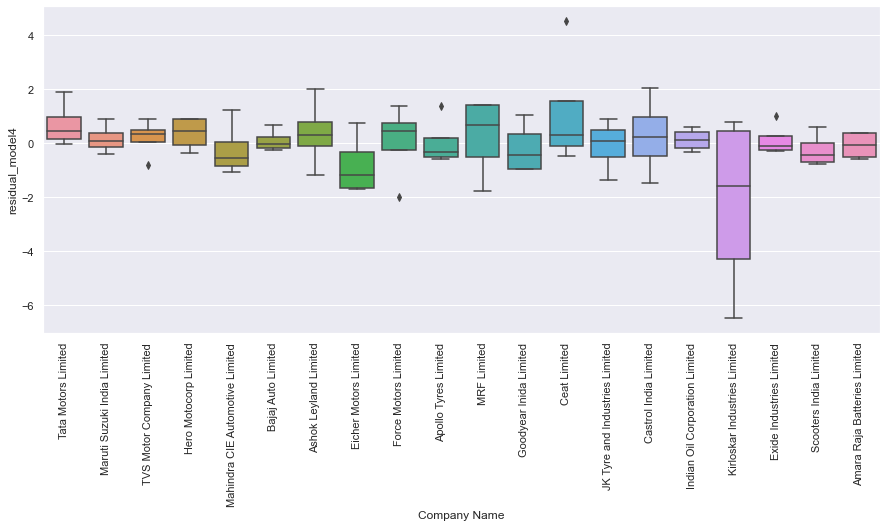

In [218]:
plt.figure(figsize=(15, 6))
plot = sn.boxplot(data = automotive_stocks_predicted_model4, x = 'Company Name', y = 'residual_model4');
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
#plot.set(ylim=(-11,6))

## Model 5 
#### Hyper-parameters:
  1. z-score Scaling
  2. Filling Null values : Calculate average value of the month which has missing values and fill NAs with the average value.
     - Example: If 'Tax' column is empty for Marh 2014, pcik the values of March 2015, March 2016, March 2017 and March 2018 and calculate the average. Fill the result as value for March 2014.

### Imputing Columns that have null values

In [336]:
#Creating a class for custom Imputer which will be included into the model pipeline

class CustomTransformerForNA_model5(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print('\n')

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        mydata = X.copy()
        #print(mydata)
        if ('Month' not in mydata):
            mydata.insert(loc=2, column='Month', value=["" for i in range(mydata.shape[0])])
            mydata.insert(loc=3, column='Year', value=["" for i in range(mydata.shape[0])])
            for i in range(0,mydata.shape[0]):
                x= mydata.iloc[i,1].split(" '",1)
                mydata.iloc[i,2] = x[0]
                mydata.iloc[i,3] = "20"+x[1]
            mydata = mydata.set_index('Time Period')
            
        mydata['Consumption of Raw Materials'] = mydata['Consumption of Raw Materials'].fillna(0)
        for i in range(mydata.shape[0]):
            for l in range(mydata.shape[1]):
                if (pd.isna(mydata.iloc[i][l]) == True) :
                    array1 =[]
                    mon = mydata.iloc[i]['Month']
                    year = mydata.iloc[i]['Year']
                    comp = mydata.iloc[i]['Company Name']
                    for n in range(mydata.shape[0]):
                        if (mydata['Month'][n] == mon):
                            array1.append(mydata.iloc[n][l])
                    array1 = [x for x in array1 if str(x) != 'nan']
                    if (len(array1) != 0):
                        imputed_value = sum(array1)/len(array1)
                    else:
                        imputed_value = 0
                    for k in range(mydata.shape[0]):
                        for m in range(mydata.shape[1]):
                            if (mydata['Company Name'][k] == comp and mydata['Month'][k] == mon and mydata['Year'][k] == year and pd.isna(mydata.iloc[k][m])== True):
                                 mydata.iloc[[k],[m]]= imputed_value
        return mydata

### Scaling data using Z-score Method

In [417]:
#Creating a class for Scaling along with few custom steps which will be included into the model pipeline

class ZscoreTransformerForScaling_model5(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print('\n')

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        mydata = X.copy()
        orig = mydata.copy()
        mydata = mydata.drop(['Month'], axis=1)
        mydata = mydata.drop(['Year'], axis=1)
        if ('Stock Price' in mydata):
            mydata = mydata.drop(['Stock Price'], axis=1)
        print(mydata)
        if ('Actual Percentage Return' in mydata):
            count =3
        else:
            count=2
        std_scaler = StandardScaler()
        automotive_stocks_scaled= std_scaler.fit_transform(mydata.iloc[:,count:mydata.shape[1]])
        #print(automotive_stocks_scaled)
        automotive_stocks_scaled = pd.DataFrame(automotive_stocks_scaled, columns=['Total Income From Operations', 'Consumption of Raw Materials', 'Employees Cost', 'Depreciation','Other Expenses','Other Income','Interest','Tax','Net Profit/(Loss) For the Period','Equity Share Capital','Diluted EPS Before Extra Ordinary','Crude Oil Price','GDP'], index=mydata.index)
        
        automotive_stocks_scaled.insert(0, 'Company Name', mydata['Company Name'])
        final_data = automotive_stocks_scaled.iloc[:,1:automotive_stocks_scaled.shape[1]]
        #print(final_data)
        return final_data

In [418]:
#Creating a pipeline with custom imputers and scaling
lreg_model5 = Pipeline(steps=[
                       ('custom_null', CustomTransformerForNA_model5()),
                       ('custom_scale', ZscoreTransformerForScaling_model5()),
                       ('regressor', LinearRegression())
])

# Building Linear Model

## Fitting the linear model on training data and predicting on test data

In [419]:
automotive_stocks_predicted_model5 = pd.DataFrame()
array = np.array(train['Company Name'].unique())
for j in range(0,len(array)):
    new_df =[]
    new_train_df = train[train['Company Name'] == array[j]]
    new_test_df = test[test['Company Name'] == array[j]]
    
    #fitting model on training data
    lreg_model5.fit(new_train_df, new_train_df["Actual Percentage Return"])

    #predicting on test data
    y_pred = lreg_model5.predict(new_test_df)
    y_pred = pd.Series(y_pred, index=new_test_df.index)

    #creating dataframe to store predicted values for all companies
    y_df = pd.DataFrame({"Company Name":array[j],"actual": new_test_df['Actual Percentage Return'],
                     "predicted_model5": y_pred,
                     "residual_model5": y_pred - new_test_df['Actual Percentage Return']})
    automotive_stocks_predicted_model5 = automotive_stocks_predicted_model5.append(y_df, ignore_index = False)

                    Company Name  Actual Percentage Return  Percentage Return  \
Time Period                                                                     
Jun '14      Tata Motors Limited                    0.1031             0.1497   
Sep '14      Tata Motors Limited                    0.1190             0.1031   
Dec '14      Tata Motors Limited                   -0.0327             0.1190   
Mar '15      Tata Motors Limited                    0.0658            -0.0327   
Jun '15      Tata Motors Limited                   -0.2350             0.0658   
Sep '15      Tata Motors Limited                   -0.3473            -0.2350   
Dec '15      Tata Motors Limited                    0.3098            -0.3473   
Mar '16      Tata Motors Limited                   -0.0143             0.3098   
Jun '16      Tata Motors Limited                    0.1935            -0.0143   
Sep '16      Tata Motors Limited                    0.1532             0.1935   
Dec '16      Tata Motors Lim

                      Company Name  Actual Percentage Return  \
Time Period                                                    
Jun '14      Ashok Leyland Limited                    0.5433   
Sep '14      Ashok Leyland Limited                    0.1274   
Dec '14      Ashok Leyland Limited                    0.2491   
Mar '15      Ashok Leyland Limited                    0.4261   
Jun '15      Ashok Leyland Limited                   -0.0102   
Sep '15      Ashok Leyland Limited                    0.2715   
Dec '15      Ashok Leyland Limited                   -0.0472   
Mar '16      Ashok Leyland Limited                    0.2355   
Jun '16      Ashok Leyland Limited                   -0.0944   
Sep '16      Ashok Leyland Limited                   -0.1906   
Dec '16      Ashok Leyland Limited                    0.0063   
Mar '17      Ashok Leyland Limited                    0.0556   
Jun '17      Ashok Leyland Limited                    0.1100   
Sep '17      Ashok Leyland Limited      

Dec '19                                   8.00            61.32  3297491.819  
                      Company Name  Actual Percentage Return  \
Time Period                                                    
Jun '14      Castrol India Limited                    0.0442   
Sep '14      Castrol India Limited                    0.3221   
Dec '14      Castrol India Limited                    0.1693   
Mar '15      Castrol India Limited                   -0.0565   
Jun '15      Castrol India Limited                   -0.0845   
Sep '15      Castrol India Limited                    0.0205   
Dec '15      Castrol India Limited                   -0.0027   
Mar '16      Castrol India Limited                   -0.1523   
Jun '16      Castrol India Limited                    0.0130   
Sep '16      Castrol India Limited                    0.2532   
Dec '16      Castrol India Limited                   -0.1985   
Mar '17      Castrol India Limited                    0.1360   
Jun '17      Castrol Indi

                       Company Name  Actual Percentage Return  \
Time Period                                                     
Jun '14      Scooters India Limited                    0.9231   
Sep '14      Scooters India Limited                   -0.1808   
Dec '14      Scooters India Limited                    0.2734   
Mar '15      Scooters India Limited                   -0.2163   
Jun '15      Scooters India Limited                   -0.0783   
Sep '15      Scooters India Limited                    0.3524   
Dec '15      Scooters India Limited                   -0.1366   
Mar '16      Scooters India Limited                   -0.0636   
Jun '16      Scooters India Limited                    0.0466   
Sep '16      Scooters India Limited                    0.5158   
Dec '16      Scooters India Limited                   -0.0661   
Mar '17      Scooters India Limited                    0.0485   
Jun '17      Scooters India Limited                    0.1875   
Sep '17      Scooters Ind

In [389]:
automotive_stocks_predicted_model5

,Company Name,actual,predicted_model5,residual_model5
Time Period,,,,
Mar '19,Tata Motors Limited,0.0312,0.446547,0.415347
Jun '19,Tata Motors Limited,-0.0701,0.331416,0.401516
Sep '19,Tata Motors Limited,-0.2817,-0.796121,-0.514421
Dec '19,Tata Motors Limited,0.5221,-0.137801,-0.659901
Mar '19,Maruti Suzuki India Limited,-0.1164,0.664084,0.780484
...,...,...,...,...
Dec '19,Scooters India Limited,0.1095,1.203241,1.093741
Mar '19,Amara Raja Batteries Limited,-0.0342,-0.174528,-0.140328
Jun '19,Amara Raja Batteries Limited,-0.1359,0.149679,0.285579


### Measuring Accuracy

In [224]:
accuracy_df_model5 = pd.DataFrame()
for j in range(0,len(array)):
    new_df =[]
    new_train_df = automotive_stocks_predicted_model5[automotive_stocks_predicted_model5['Company Name'] == array[j]]
    print(new_train_df)
    mse_v1 = mean_squared_error(new_train_df['actual'], new_train_df['predicted_model5'])
    rmse_v1 = np.sqrt(mse_v1)
    r2_v1 = r2_score(new_train_df['actual'], new_train_df['predicted_model5'])
    temp_df = pd.DataFrame({"Company Name": array[j],"MSE_model5": [mse_v1], "RMSE_model5": [rmse_v1],"R2_model5": [r2_v1]})
    accuracy_df_model5 = accuracy_df_model5.append(temp_df, ignore_index = True)

                    Company Name  actual  predicted_model5  residual_model5
Time Period                                                                
Mar '19      Tata Motors Limited  0.0312          0.446547         0.415347
Jun '19      Tata Motors Limited -0.0701          0.331416         0.401516
Sep '19      Tata Motors Limited -0.2817         -0.796121        -0.514421
Dec '19      Tata Motors Limited  0.5221         -0.137801        -0.659901
                            Company Name  actual  predicted_model5  \
Time Period                                                          
Mar '19      Maruti Suzuki India Limited -0.1164          0.664084   
Jun '19      Maruti Suzuki India Limited -0.0093         -0.393579   
Sep '19      Maruti Suzuki India Limited  0.0320          0.000925   
Dec '19      Maruti Suzuki India Limited  0.0927          0.054991   

             residual_model5  
Time Period                   
Mar '19             0.780484  
Jun '19            -0.384279  

In [225]:
accuracy_df_model5

,Company Name,MSE_model5,RMSE_model5,R2_model5
0,Tata Motors Limited,0.258457,0.508386,-1.973499
1,Maruti Suzuki India Limited,0.189803,0.435664,-31.650857
2,TVS Motor Company Limited,0.128786,0.358867,-10.720726
3,Hero Motocorp Limited,0.154648,0.393254,-16.428107
4,Mahindra CIE Automotive Limited,0.286169,0.534947,-23.195539
5,Bajaj Auto Limited,0.037931,0.194760,-13.632843
6,Ashok Leyland Limited,0.911728,0.954845,-39.215722
7,Eicher Motors Limited,0.711474,0.843489,-29.526914
8,Force Motors Limited,1.581294,1.257495,-136.961947
9,Apollo Tyres Limited,0.420460,0.648429,-4919.140412


### Error Analysis

[Text(0, 0, 'Tata Motors Limited'),
 Text(1, 0, 'Maruti Suzuki India Limited'),
 Text(2, 0, 'TVS Motor Company Limited'),
 Text(3, 0, 'Hero Motocorp Limited'),
 Text(4, 0, 'Mahindra CIE Automotive Limited'),
 Text(5, 0, 'Bajaj Auto Limited'),
 Text(6, 0, 'Ashok Leyland Limited'),
 Text(7, 0, 'Eicher Motors Limited'),
 Text(8, 0, 'Force Motors Limited'),
 Text(9, 0, 'Apollo Tyres Limited'),
 Text(10, 0, 'MRF Limited'),
 Text(11, 0, 'Goodyear Inida Limited'),
 Text(12, 0, 'Ceat Limited'),
 Text(13, 0, 'JK Tyre and Industries Limited'),
 Text(14, 0, 'Castrol India Limited'),
 Text(15, 0, 'Indian Oil Corporation Limited'),
 Text(16, 0, 'Kirloskar Industries Limited'),
 Text(17, 0, 'Exide Industries Limited'),
 Text(18, 0, 'Scooters India Limited'),
 Text(19, 0, 'Amara Raja Batteries Limited')]

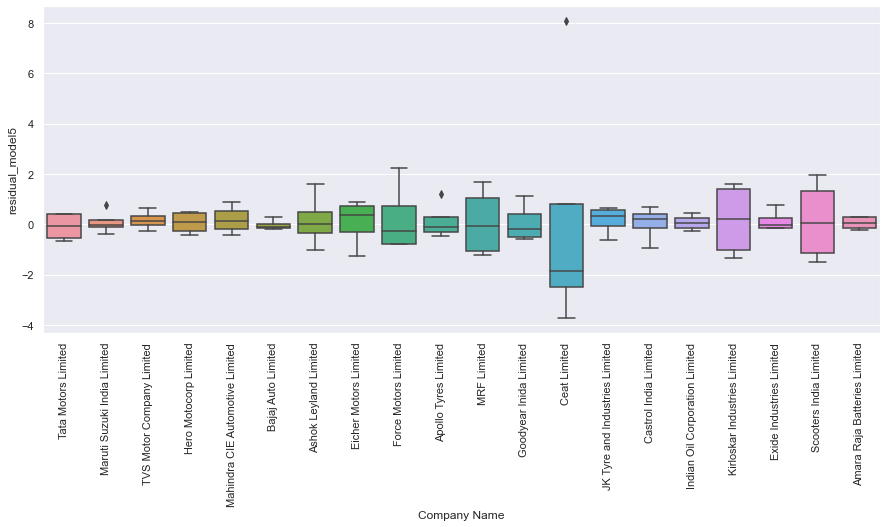

In [226]:
plt.figure(figsize=(15, 6))
plot = sn.boxplot(data = automotive_stocks_predicted_model5, x = 'Company Name', y = 'residual_model5');
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
#plot.set(ylim=(-4,4))

## Model 6

### Hyper-parameters:
  1. z-score Scaling
  2. Filling Null values : using Random Forest Method

### Imputing Columns that have null values using Random Forest Method

In [227]:
#Creating a class for custom Imputer which will be included into the model pipeline

class RMTransformerForNA_model6(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print('\n')

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        mydata = X.copy()
        mydata = mydata.drop(['Company Name'], axis=1)
        mydata = mydata.drop(['Actual Percentage Return'], axis=1)
        mydata = mydata.drop(['Percentage Return'], axis=1)
        mydata = mydata.drop(['Month'], axis=1)
        mydata = mydata.drop(['Year'], axis=1)
                
        mylist = mydata.isna().all()
        for m in range(0,len(mylist)):
            if (mylist[m] == True):
                cols = mydata.columns[m]
                mydata[cols].fillna(0, inplace=True)
        
        imputer = MissForest() #miss forest
        imputed = imputer.fit_transform(mydata)
        imputed = pd.DataFrame(imputed, columns = mydata.columns).round(1)
        return imputed

### Scaling data using Z-score Method

In [228]:
#Creating a class for Scaling along with few custom steps which will be included into the model pipeline

class ZscoreTransformerForScaling_model6(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print('\n')

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        mydata = X.copy()
        orig = mydata.copy()
        std_scaler = StandardScaler()
        automotive_stocks_scaled= std_scaler.fit_transform(mydata)
        automotive_stocks_scaled = pd.DataFrame(automotive_stocks_scaled, columns=['Total Income From Operations', 'Consumption of Raw Materials', 'Employees Cost', 'Depreciation','Other Expenses','Other Income','Interest','Tax','Net Profit/(Loss) For the Period','Equity Share Capital','Diluted EPS Before Extra Ordinary','Crude Oil Price','GDP'], index=mydata.index)
        return automotive_stocks_scaled

In [229]:
#Creating a pipeline with custom imputers and scaling
lreg_model6 = Pipeline(steps=[
                       ('custom_null', RMTransformerForNA_model6()),
                       ('custom_scale', ZscoreTransformerForScaling_model6()),
                       ('regressor', LinearRegression())
])

# Building Linear Model

## Fitting the linear model on training data and predicting on test data

In [230]:
automotive_stocks_predicted_model6 = pd.DataFrame()
array = np.array(train['Company Name'].unique())
for j in range(0,len(array)):
    new_df =[]
    new_train_df = train[train['Company Name'] == array[j]]
    new_test_df = test[test['Company Name'] == array[j]]
    
    #fitting model on training data
    lreg_model6.fit(new_train_df, new_train_df["Actual Percentage Return"])
    
    #predicting on test data
    y_pred = lreg_model6.predict(new_test_df)
    y_pred = pd.Series(y_pred, index=new_test_df.index)

    #creating dataframe to store predicted values for all companies
    y_df = pd.DataFrame({"Company Name":array[j],"actual": new_test_df['Actual Percentage Return'],
                     "predicted_model6": y_pred,
                     "residual_model6": y_pred - new_test_df['Actual Percentage Return']})
    automotive_stocks_predicted_model6 = automotive_stocks_predicted_model6.append(y_df, ignore_index = False)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning or

Iteration: 0
Iteration: 1
Iteration: 2


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning or

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 2
Iteration: 0


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/Users/anjana/opt/anaconda3/lib/python3.9/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


In [231]:
automotive_stocks_predicted_model6

,Company Name,actual,predicted_model6,residual_model6
Time Period,,,,
Mar '19,Tata Motors Limited,0.0312,0.757049,0.725849
Jun '19,Tata Motors Limited,-0.0701,-0.310789,-0.240689
Sep '19,Tata Motors Limited,-0.2817,-0.218950,0.062750
Dec '19,Tata Motors Limited,0.5221,-0.383269,-0.905369
Mar '19,Maruti Suzuki India Limited,-0.1164,0.563863,0.680263
...,...,...,...,...
Dec '19,Scooters India Limited,0.1095,-0.067284,-0.176784
Mar '19,Amara Raja Batteries Limited,-0.0342,-0.286830,-0.252630
Jun '19,Amara Raja Batteries Limited,-0.1359,0.196466,0.332366


### Measuring Accuracy

In [232]:
accuracy_df_model6 = pd.DataFrame()
for j in range(0,len(array)):
    new_df =[]
    new_train_df = automotive_stocks_predicted_model6[automotive_stocks_predicted_model6['Company Name'] == array[j]]
    mse_v1 = mean_squared_error(new_train_df['actual'], new_train_df['predicted_model6'])
    rmse_v1 = np.sqrt(mse_v1)
    r2_v1 = r2_score(new_train_df['actual'], new_train_df['predicted_model6'])
    temp_df = pd.DataFrame({"Company Name": array[j],"MSE_model6": [mse_v1], "RMSE_model6": [rmse_v1],"R2_model6": [r2_v1]})
    accuracy_df_model6 = accuracy_df_model6.append(temp_df, ignore_index = True)

In [233]:
accuracy_df_model6

,Company Name,MSE_model6,RMSE_model6,R2_model6
0,Tata Motors Limited,0.352105,0.593384,-3.050903
1,Maruti Suzuki India Limited,0.157659,0.397063,-26.121242
2,TVS Motor Company Limited,0.174520,0.417756,-14.882935
3,Hero Motocorp Limited,0.152245,0.390186,-16.157264
4,Mahindra CIE Automotive Limited,0.469312,0.685064,-38.680303
5,Bajaj Auto Limited,0.039481,0.198699,-14.230707
6,Ashok Leyland Limited,0.851131,0.922567,-36.542803
7,Eicher Motors Limited,0.581158,0.762337,-23.935512
8,Force Motors Limited,0.967197,0.983462,-83.384265
9,Apollo Tyres Limited,0.362495,0.602076,-4240.851386


### Error Analysis

[Text(0, 0, 'Tata Motors Limited'),
 Text(1, 0, 'Maruti Suzuki India Limited'),
 Text(2, 0, 'TVS Motor Company Limited'),
 Text(3, 0, 'Hero Motocorp Limited'),
 Text(4, 0, 'Mahindra CIE Automotive Limited'),
 Text(5, 0, 'Bajaj Auto Limited'),
 Text(6, 0, 'Ashok Leyland Limited'),
 Text(7, 0, 'Eicher Motors Limited'),
 Text(8, 0, 'Force Motors Limited'),
 Text(9, 0, 'Apollo Tyres Limited'),
 Text(10, 0, 'MRF Limited'),
 Text(11, 0, 'Goodyear Inida Limited'),
 Text(12, 0, 'Ceat Limited'),
 Text(13, 0, 'JK Tyre and Industries Limited'),
 Text(14, 0, 'Castrol India Limited'),
 Text(15, 0, 'Indian Oil Corporation Limited'),
 Text(16, 0, 'Kirloskar Industries Limited'),
 Text(17, 0, 'Exide Industries Limited'),
 Text(18, 0, 'Scooters India Limited'),
 Text(19, 0, 'Amara Raja Batteries Limited')]

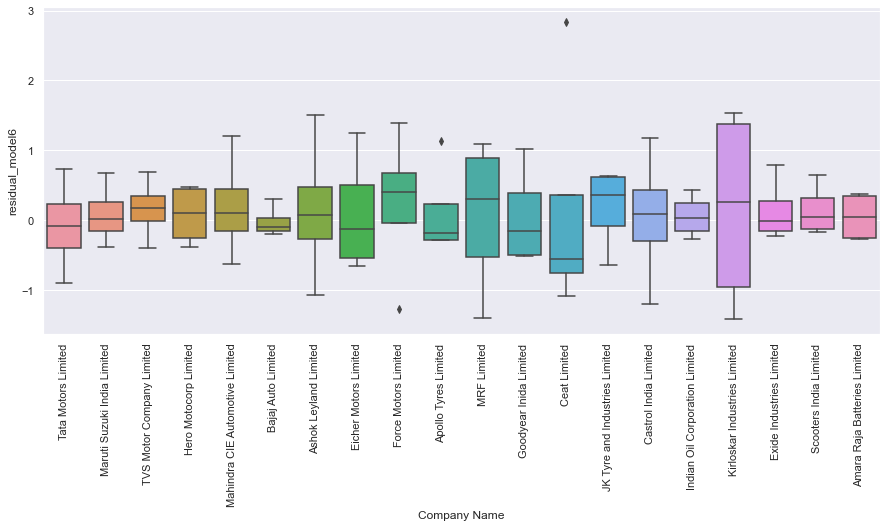

In [234]:
plt.figure(figsize=(15, 6))
plot = sn.boxplot(data = automotive_stocks_predicted_model6, x = 'Company Name', y = 'residual_model6');
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
#plot.set(ylim=(-4,4))

# Finding The Best Linear Model (among the above 6 models)

In [235]:
accuracy_df1 = pd.merge(accuracy_df_model1, accuracy_df_model2, on='Company Name', how='outer')
accuracy_df2 = pd.merge(accuracy_df1, accuracy_df_model3, on='Company Name', how='outer')
accuracy_df3 = pd.merge(accuracy_df2, accuracy_df_model4, on='Company Name', how='outer')
accuracy_df4 = pd.merge(accuracy_df3, accuracy_df_model5, on='Company Name', how='outer')
accuracy_df = pd.merge(accuracy_df4, accuracy_df_model6, on='Company Name', how='outer')
accuracy_df

,Company Name,MSE_model1,RMSE_model1,R2_model1,MSE_model2,RMSE_model2,R2_model2,MSE_model3,RMSE_model3,R2_model3,MSE_model4,RMSE_model4,R2_model4,MSE_model5,RMSE_model5,R2_model5,MSE_model6,RMSE_model6,R2_model6
0,Tata Motors Limited,1.181732,1.087075,-12.595623,0.874886,0.935354,-9.065416,0.561202,0.749134,-5.456528,1.032308,1.016025,-10.876521,0.258457,0.508386,-1.973499,0.352105,0.593384,-3.050903
1,Maruti Suzuki India Limited,0.048404,0.220008,-7.326602,0.036114,0.190036,-5.212423,0.260826,0.510711,-43.868474,0.247977,0.497973,-41.658154,0.189803,0.435664,-31.650857,0.157659,0.397063,-26.121242
2,TVS Motor Company Limited,0.025271,0.158970,-1.299944,0.041423,0.203528,-2.769928,0.352092,0.593374,-31.043724,0.423719,0.650937,-37.562391,0.128786,0.358867,-10.720726,0.174520,0.417756,-14.882935
3,Hero Motocorp Limited,0.188967,0.434703,-20.295599,0.180141,0.424430,-19.300963,0.445559,0.667502,-49.212293,0.439242,0.662753,-48.500430,0.154648,0.393254,-16.428107,0.152245,0.390186,-16.157264
4,Mahindra CIE Automotive Limited,3.856054,1.963684,-325.028950,3.845279,1.960938,-324.117940,0.453389,0.673342,-37.334028,0.838944,0.915939,-69.932649,0.286169,0.534947,-23.195539,0.469312,0.685064,-38.680303
5,Bajaj Auto Limited,0.039363,0.198401,-14.185099,0.039219,0.198038,-14.129564,0.124802,0.353274,-47.145066,0.129118,0.359329,-48.809797,0.037931,0.194760,-13.632843,0.039481,0.198699,-14.230707
6,Ashok Leyland Limited,0.277030,0.526336,-11.219588,0.191533,0.437645,-7.448394,1.398479,1.182573,-60.685978,1.394477,1.180880,-60.509471,0.911728,0.954845,-39.215722,0.851131,0.922567,-36.542803
7,Eicher Motors Limited,2.838368,1.684746,-120.784660,2.815896,1.678063,-119.820476,2.015705,1.419755,-85.486999,1.654366,1.286222,-69.983181,0.711474,0.843489,-29.526914,0.581158,0.762337,-23.935512
8,Force Motors Limited,3.566535,1.888527,-310.166664,8.342617,2.888359,-726.861746,2.443314,1.563110,-212.169884,1.592002,1.261746,-137.896134,1.581294,1.257495,-136.961947,0.967197,0.983462,-83.384265
9,Apollo Tyres Limited,0.141475,0.376132,-1654.514192,0.223503,0.472761,-2614.391754,0.690309,0.830848,-8076.866348,0.632766,0.795466,-7403.510487,0.420460,0.648429,-4919.140412,0.362495,0.602076,-4240.851386


In [236]:
Avg_RMSE_model1 = sum(accuracy_df['RMSE_model1'])/len(accuracy_df['RMSE_model1'])
print("Average RMSE for Model1: ",Avg_RMSE_model1)
Avg_RMSE_model2 = sum(accuracy_df['RMSE_model2'])/len(accuracy_df['RMSE_model2'])
print("Average RMSE for Model2: ",Avg_RMSE_model2)
Avg_RMSE_model3 = sum(accuracy_df['RMSE_model3'])/len(accuracy_df['RMSE_model3'])
print("Average RMSE for Model3: ",Avg_RMSE_model3)
Avg_RMSE_model4 = sum(accuracy_df['RMSE_model4'])/len(accuracy_df['RMSE_model4'])
print("Average RMSE for Model4: ",Avg_RMSE_model4)
Avg_RMSE_model5 = sum(accuracy_df['RMSE_model5'])/len(accuracy_df['RMSE_model5'])
print("Average RMSE for Model5: ",Avg_RMSE_model5)
Avg_RMSE_model6 = sum(accuracy_df['RMSE_model6'])/len(accuracy_df['RMSE_model6'])
print("Average RMSE for Model6: ",Avg_RMSE_model6)

Average RMSE for Model1:  0.8913862198267297
Average RMSE for Model2:  0.7745048472170982
Average RMSE for Model3:  1.3262230289339492
Average RMSE for Model4:  1.0462522244664556
Average RMSE for Model5:  0.8749002176000525
Average RMSE for Model6:  0.6592364506291128


In [237]:
Avg_R2_model1 = sum(accuracy_df['R2_model1'])/len(accuracy_df['R2_model1'])
print("Average R2 for Model1: ",Avg_R2_model1)
Avg_R2_model2 = sum(accuracy_df['R2_model2'])/len(accuracy_df['R2_model2'])
print("Average R2 for Model2: ",Avg_R2_model2)
Avg_R2_model3 = sum(accuracy_df['R2_model3'])/len(accuracy_df['R2_model3'])
print("Average R2 for Model3: ",Avg_R2_model3)
Avg_R2_model4 = sum(accuracy_df['R2_model4'])/len(accuracy_df['R2_model4'])
print("Average R2 for Model4: ",Avg_R2_model4)
Avg_R2_model5 = sum(accuracy_df['R2_model5'])/len(accuracy_df['R2_model5'])
print("Average R2 for Model5: ",Avg_R2_model5)
Avg_R2_model6 = sum(accuracy_df['R2_model6'])/len(accuracy_df['R2_model6'])
print("Average R2 for Model6: ",Avg_R2_model6)

Average R2 for Model1:  -228.00720268833098
Average R2 for Model2:  -228.37632642896233
Average R2 for Model3:  -1000.3565017134694
Average R2 for Model4:  -741.4353163651562
Average R2 for Model5:  -446.7610593367187
Average R2 for Model6:  -298.58202961018634


In [238]:
AR2_model1 = 1-((1-Avg_R2_model1)*(4-1)/(4-len(x_features)-1))
print("Average Adjusted R2 for Model1: ",AR2_model1)
AR2_model2 = 1-((1-Avg_R2_model2)*(4-1)/(4-len(x_features)-1))
print("Average Adjusted R2 for Model2: ",AR2_model2)
AR2_model3 = 1-((1-Avg_R2_model3)*(4-1)/(4-len(x_features)-1))
print("Average Adjusted R2 for Model3: ",AR2_model3)
AR2_model4 = 1-((1-Avg_R2_model4)*(4-1)/(4-len(x_features)-1))
print("Average Adjusted R2 for Model4: ",AR2_model4)
AR2_model5 = 1-((1-Avg_R2_model5)*(4-1)/(4-len(x_features)-1))
print("Average Adjusted R2 for Model5: ",AR2_model5)
AR2_model6 = 1-((1-Avg_R2_model6)*(4-1)/(4-len(x_features)-1))
print("Average Adjusted R2 for Model6: ",AR2_model6)

Average Adjusted R2 for Model1:  69.7021608064993
Average Adjusted R2 for Model2:  69.8128979286887
Average Adjusted R2 for Model3:  301.40695051404083
Average Adjusted R2 for Model4:  223.73059490954682
Average Adjusted R2 for Model5:  135.3283178010156
Average Adjusted R2 for Model6:  90.87460888305591


### Selection Model5 based on RMSE score. Though Model 1's RMSE score is slightly higher than Model5's RMSE score, preference is given to the model with scaling as it may prove to be a better model for a large dataset.

## Saving the model

In [323]:
class StockPredictionModel():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [420]:
final_model = StockPredictionModel(lreg_model5, list(train.columns), Avg_RMSE_model5)

In [421]:
from joblib import dump

In [422]:
dump(final_model, './stocks.pkl')

['./stocks.pkl']

## Loading the saved model for Prediction

In [423]:
from joblib import load

In [424]:
model_v1 = load("stocks.pkl")

In [425]:
type(model_v1)

__main__.StockPredictionModel

In [426]:
model_v1.model

Pipeline(steps=[('custom_null', CustomTransformerForNA_model5()),
                ('custom_scale', ZscoreTransformerForScaling_model5()),
                ('regressor', LinearRegression())])

In [427]:
model_v1.rmse

0.8749002176000525

In [428]:
model_v1.features

['Company Name',
 'Actual Percentage Return',
 'Month',
 'Year',
 'Percentage Return',
 'Total Income From Operations',
 'Consumption of Raw Materials',
 'Employees Cost',
 'Depreciation',
 'Other Expenses',
 'Other Income',
 'Interest',
 'Tax',
 'Net Profit/(Loss) For the Period',
 'Equity Share Capital',
 'Diluted EPS Before Extra Ordinary',
 'Crude Oil Price',
 'GDP']

In [432]:
predict_stocks_df = pd.read_csv('Predict.csv')

In [433]:
pd.DataFrame(predict_stocks_df.dtypes)

,0
Company Name,object
Time Period,object
Stock Price,float64
Percentage Return,float64
Total Income From Operations,float64
Consumption of Raw Materials,float64
Employees Cost,float64
Depreciation,float64
Other Expenses,float64
Other Income,float64


In [434]:
final_model = model_v1.model.predict(predict_stocks_df)

                    Company Name  Percentage Return  \
Time Period                                           
Mar '21      Tata Motors Limited               0.65   
Jun '21      Tata Motors Limited               0.10   
Sep '21      Tata Motors Limited              -0.02   
Dec '21      Tata Motors Limited               0.40   

             Total Income From Operations  Consumption of Raw Materials  \
Time Period                                                               
Mar '21                          20045.90                      12914.62   
Jun '21                          11904.19                       8813.14   
Sep '21                          10996.02                       7256.09   
Dec '21                          12352.78                       8499.61   

             Employees Cost  Depreciation  Other Expenses  Other Income  \
Time Period                                                               
Mar '21             1081.76        964.16         2396.95        260

array([-0.0087419 ,  0.25343524, -0.20097028,  0.13000324])